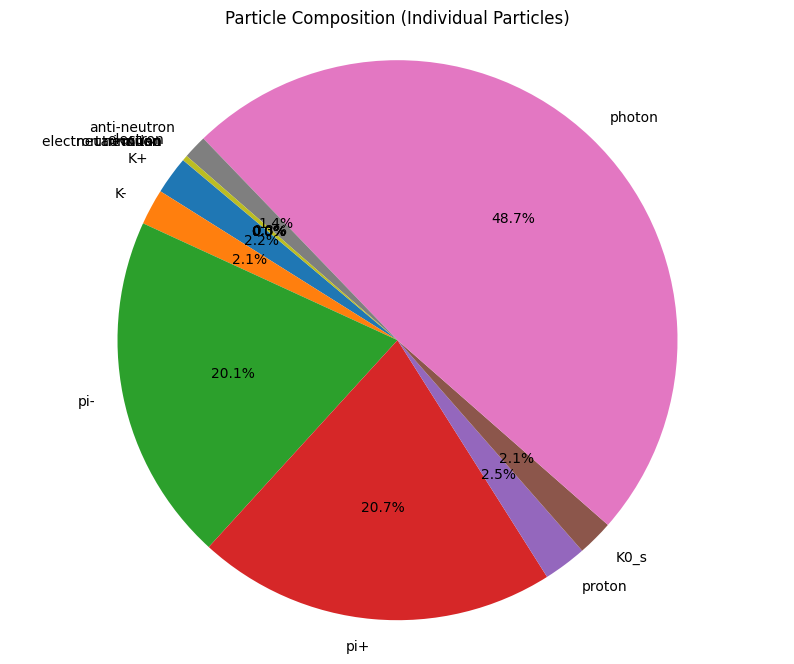

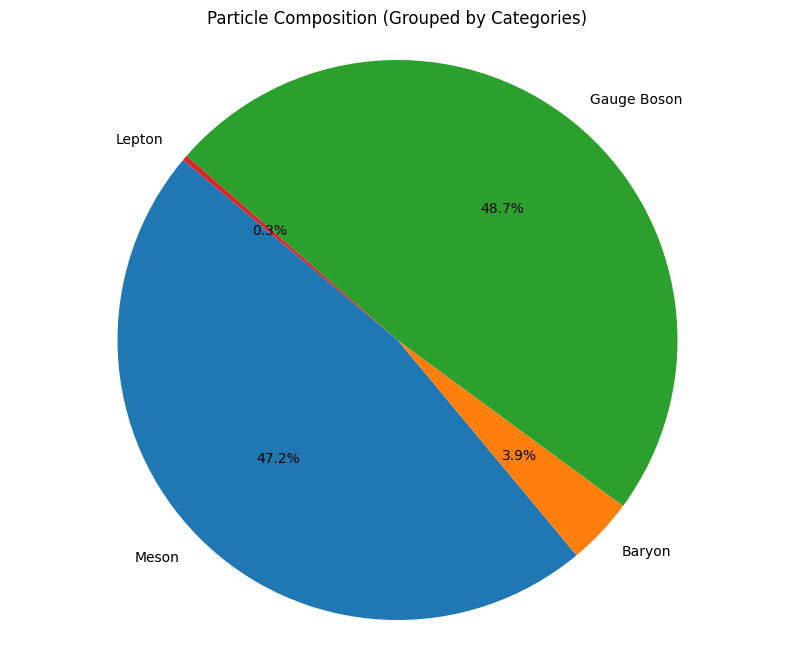

In [2]:
import ROOT
from collections import defaultdict
import matplotlib.pyplot as plt

# Open the ROOT file
file = ROOT.TFile("common.root", "READ")
tree = file.Get("tree")

# Initialize dictionaries to count particles
particle_count = defaultdict(int)
category_count = defaultdict(int)

# Particle ID to name mapping (including new leptons)
particle_names = {
    
    211: 'pi+', -211: 'pi-', 22: 'photon', 
    321: 'K+', -321: 'K-', -2212: 'anti-neutron', 2212: 'proton',
    130: 'K0_s', 11: 'electron', 13: 'muon', 12: 'electron neutrino', 
    14: 'tau muon', 16: 'neutrino tau'
}

# Particle ID to category mapping (including leptons)
particle_categories = {
    'pi+': 'Meson', 'pi-': 'Meson', 'photon': 'Gauge Boson',
    'K+': 'Meson', 'K-': 'Meson', 'anti-neutron': 'Baryon', 'proton': 'Baryon',
    'K0_s': 'Meson', 'electron': 'Lepton', 'muon': 'Lepton', 
    'electron neutrino': 'Lepton', 'tau muon': 'Lepton', 'neutrino tau': 'Lepton'
}

# Loop over all entries in the TTree
for event in tree:
    particle_id = event.id
    # Count the individual particles
    if particle_id in particle_names:
        particle_count[particle_names[particle_id]] += 1
        # Count the categories
        category = particle_categories.get(particle_names[particle_id], 'Unknown')
        category_count[category] += 1

# --- First Pie Chart: Particle Composition (Individual Particles) ---
labels = []
sizes = []

for particle, count in particle_count.items():
    labels.append(particle)
    sizes.append(count)

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Particle Composition (Individual Particles)')
plt.axis('equal')
plt.show()

# --- Second Pie Chart: Particle Composition (Grouped into Categories) ---
category_labels = []
category_sizes = []

for category, count in category_count.items():
    category_labels.append(category)
    category_sizes.append(count)

plt.figure(figsize=(10, 8))
plt.pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=140)
plt.title('Particle Composition (Grouped by Categories)')
plt.axis('equal')
plt.show()


Unique Particle IDs: [-2212, -2112, -321, -211, -16, -14, -13, -12, -11, 11, 12, 13, 14, 16, 22, 130, 211, 321, 2112, 2212]


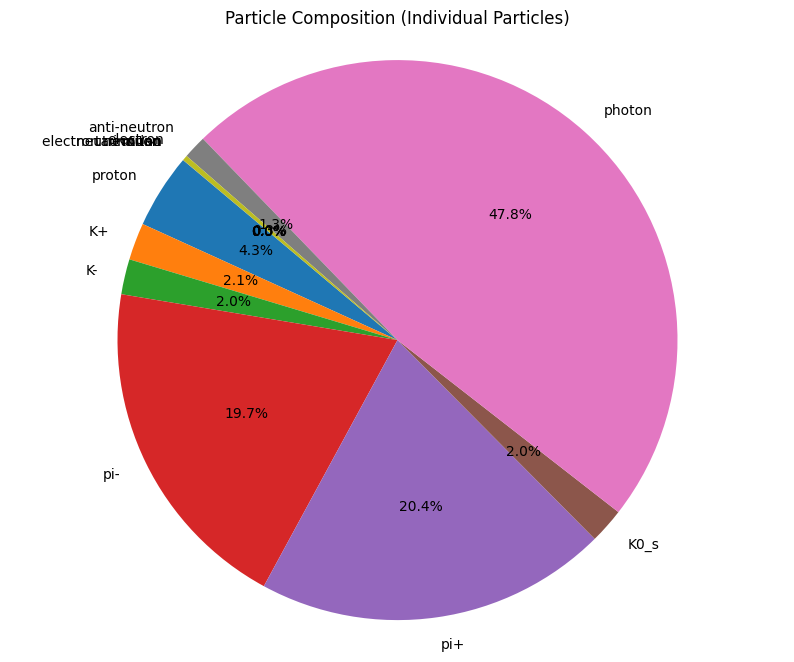

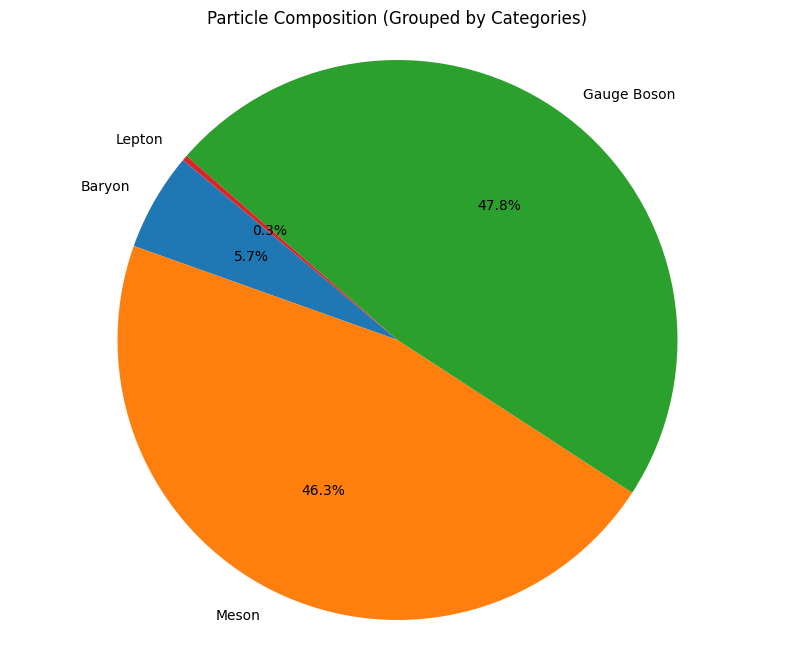

In [2]:

# Initialize a set to store unique particle IDs
unique_ids = set()

# Loop over all entries in the TTree
for event in tree:
    unique_ids.add(event.id)  # Add each particle ID to the set

# Convert the set to a sorted list for better readability
unique_ids_list = sorted(unique_ids)

# Print the list of unique particle IDs
print("Unique Particle IDs:", uniqdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxoAAAKYCAYAAAD0T441AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAA2RdJREFUeJzs3XV8VfX/B/DXuffuxro3FmywoDskpJEaSCoqKmCiooKCYgP6tbuwAYuQVKS7G8ZgMMZYd/ft8/tjP67ODdjY3c5293o+HjyUk+9dtrv7Op8SRFEUQUREREREZEUyqQsgIiIiIiLbw6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRERERERWx6BBRACAhQsXQhCEWp83ePBgDB482PoFEZYtWwZBEJCQkHDTY/fu3QtBELB37956r6s6ZrMZHTt2xP/+9796vU9CQgIEQcCyZcss2271excABEHAwoULb3pcXe5RU1L/G9ZGY3y/iI6OhkKhwPnz5+vl+kRUewwaRI3AtQ+U1/6o1WqEh4dj9uzZyMzMtNp9ysrKsHDhwibxQWbv3r2YNGkSfH19oVQq4e3tjXHjxmHdunVSlyapr7/+utKH7MZixYoVSE5OxuzZsy3brn1fnzx5UsLKbA/fL6rXvn17RERE4PXXX5e6FCL6fwwaRI3I4sWL8csvv+DLL79Ev379sGTJEvTt2xdlZWVWuX5ZWRkWLVpU7QeHV199FeXl5Va5T1298cYbGDJkCM6fP4/HH38c33zzDebPn4+SkhJMnjwZv//+u9QlNogHHngA5eXlCAoKsmy7XtAYOHAgysvLMXDgwAas8B8ffPAB7rnnHri4uDT4vevyvVteXo5XX33VyhU1DL5fVDVr1iysX78ecXFxUpdCRAAUUhdARP8YPXo0evbsCQB45JFH4OHhgY8//hgbN27Evffee8vXNZvN0Ov1NzxGoVBAoZD+LWHNmjVYvHgxpkyZgt9//x12dnaWffPnz8e2bdtgMBgkrLDhyOVyyOXyGh0rk8mgVqvruaLqnTlzBpGRkfjoo48kuX9dvneles2sge8XVQ0fPhxubm5Yvnw5Fi9eLHU5RM0eWzSIGrGhQ4cCAOLj4wEAH374Ifr16wcPDw9oNBr06NEDa9asqXKeIAiYPXs2fvvtN3To0AEqlQrffPMNvLy8AACLFi2ydLu41j/9en2uf/31V/Tu3Rv29vZwc3PDwIEDsX379hvWrdPp8MYbbyA0NBQqlQqBgYF44YUXoNPpbvo1v/baa3B3d8dPP/1UKWRcM3LkSIwdO9by96ysLDz88MPw8fGBWq1Gly5dsHz58krnXOvX/+GHH+Krr75C69atYW9vjxEjRiA5ORmiKOLNN99EQEAANBoNxo8fj7y8vErXCA4OxtixY7F9+3Z07doVarUa7du3r7Yr19WrV3HXXXfB3d0d9vb26NOnD/7+++8qx33xxRfo0KGD5bXt2bNnpdaa/47RCA4OxoULF7Bv3z7Lv9+1/u7X69//xx9/oEePHtBoNPD09MT999+P1NTUSsfMmDEDjo6OSE1NxYQJE+Do6AgvLy/MmzcPJpOp6j/Sf2zYsAFKpbJGrSm1uVdBQQFmzJgBFxcXuLq6Yvr06SgoKKhyzf9+73bs2BFDhgypcpzZbIa/vz+mTJli2VbdGI2DBw+iV69eUKvVCAkJwbffflvlWtWNFbneNRMTE/Hkk0+iTZs20Gg08PDwwF133VWjsTe1YevvFzt27MDtt98OV1dXODo6ok2bNnj55ZcrHWNnZ4fBgwdj48aNNXvRiKheNb7HEURkca3538PDAwDw2Wef4c4778S0adOg1+uxcuVK3HXXXdi0aRMiIiIqnbt7926sXr0as2fPhqenJ7p06YIlS5bgiSeewMSJEzFp0iQAQOfOna97/0WLFmHhwoXo168fFi9eDKVSiWPHjmH37t0YMWJEteeYzWbceeedOHjwIB577DG0a9cOUVFR+OSTT3D58mVs2LDhuveLjY3FpUuX8NBDD8HJyemmr095eTkGDx6MK1euYPbs2WjVqhX++OMPzJgxAwUFBXj22WcrHf/bb79Br9fj6aefRl5eHt5//33cfffdGDp0KPbu3YsXX3wRV65cwRdffIF58+bhp59+qlLf1KlTMWvWLEyfPh1Lly7FXXfdha1bt+KOO+4AAGRmZqJfv34oKyvDM888Aw8PDyxfvhx33nkn1qxZg4kTJwIAvv/+ezzzzDOYMmUKnn32WWi1Wpw7dw7Hjh3DfffdV+3X++mnn+Lpp5+Go6MjXnnlFQCAj4/PdV+fZcuWYebMmejVqxfeeecdZGZm4rPPPsOhQ4dw5swZuLq6Wo41mUwYOXIkbrvtNnz44YfYuXMnPvroI4SEhOCJJ5644b/D4cOH0bFjx2qDYXVqci9RFDF+/HgcPHgQs2bNQrt27bB+/XpMnz79ptefOnUqFi5ciIyMDPj6+lq2Hzx4EGlpabjnnnuue25UVBRGjBgBLy8vLFy4EEajEW+88cYNX+ebOXHiBA4fPox77rkHAQEBSEhIwJIlSzB48GBER0fD3t7+lq/9b7b8fnHhwgWMHTsWnTt3xuLFi6FSqXDlyhUcOnSoyjV79OiBjRs3oqioCM7OzrV+HYnIikQiktzSpUtFAOLOnTvF7OxsMTk5WVy5cqXo4eEhajQaMSUlRRRFUSwrK6t0nl6vFzt27CgOHTq00nYAokwmEy9cuFBpe3Z2tghAfOONN6rU8MYbb4j/fkuIjY0VZTKZOHHiRNFkMlU61mw2W/5/0KBB4qBBgyx//+WXX0SZTCYeOHCg0jnffPONCEA8dOjQdV+HjRs3igDETz755LrH/Nunn34qAhB//fVXyza9Xi/27dtXdHR0FIuKikRRFMX4+HgRgOjl5SUWFBRYjn3ppZdEAGKXLl1Eg8Fg2X7vvfeKSqVS1Gq1lm1BQUEiAHHt2rWWbYWFhWKLFi3Ebt26WbbNmTNHBFDp6y8uLhZbtWolBgcHW17L8ePHix06dLjh13ft+yI+Pt6yrUOHDpVe72v27NkjAhD37NljeR28vb3Fjh07iuXl5ZbjNm3aJAIQX3/9dcu26dOniwDExYsXV7pmt27dxB49etywRlEUxYCAAHHy5MnXrf/EiRO1vteGDRtEAOL7779v2WY0GsUBAwaIAMSlS5datv/3ezcmJkYEIH7xxReV7vHkk0+Kjo6OlX6O/vvzMGHCBFGtVouJiYmWbdHR0aJcLq90j2vfU/+u43rX/O/PrSiK4pEjR0QA4s8//2zZ9t9/w+tpju8Xn3zyiQhAzM7OvuFrI4qi+Pvvv4sAxGPHjt30WCKqX+w6RdSIDB8+HF5eXggMDMQ999wDR0dHrF+/Hv7+/gAAjUZjOTY/Px+FhYUYMGAATp8+XeVagwYNQvv27W+5lg0bNsBsNuP111+HTFb5reJG01r+8ccfaNeuHdq2bYucnBzLn2vdOvbs2XPdc4uKigCgRq0ZALB582b4+vpW6o9uZ2eHZ555BiUlJdi3b1+l4++6665Kg5Vvu+02AMD9999fqb/5bbfdBr1eX6WLkZ+fn6VFAgCcnZ3x4IMP4syZM8jIyLDU1Lt3b9x+++2W4xwdHfHYY48hISEB0dHRAABXV1ekpKTgxIkTNfpaa+vkyZPIysrCk08+WWkcQkREBNq2bVttV65Zs2ZV+vuAAQNw9erVm94rNzcXbm5utarvZvfavHkzFApFpdYUuVyOp59++qbXDg8PR9euXbFq1SrLNpPJhDVr1mDcuHGVfo7+zWQyYdu2bZgwYQJatmxp2d6uXTuMHDmyxl/bf/37fgaDAbm5uQgNDYWrq2u1P7s11ZzeL661vm3cuBFms/mGtVz7XszJybnVL4eIrIRdp4gaka+++grh4eFQKBTw8fFBmzZtKv3S3rRpE9566y2cPXu2Uv/l6n6Rt2rVqk61xMXFQSaT1frDR2xsLC5evGjp3/1fWVlZ1z33WjeH4uLiGt0rMTERYWFhVT7YtGvXzrL/3/794RGAJXQEBgZWuz0/P7/S9tDQ0CqvdXh4OICKPvu+vr5ITEy0BJjr1dSxY0e8+OKL2LlzJ3r37o3Q0FCMGDEC9913H/r373/zL7wGrn3tbdq0qbKvbdu2OHjwYKVtarW6yr+Zm5tbldfgekRRrHFtNblXYmIiWrRoAUdHx0rHVff1VGfq1Kl4+eWXkZqaCn9/f+zduxdZWVmYOnXqdc/Jzs5GeXk5wsLCquxr06YNNm/eXKN7/1d5eTneeecdLF26FKmpqZVeq8LCwlu6JtC83i+mTp2KH374AY888ggWLFiAYcOGYdKkSZgyZUqVn/9rr299r3tCRDfHoEHUiPTu3dsyi8x/HThwAHfeeScGDhyIr7/+Gi1atICdnR2WLl1a7XSv13tqW9/MZjM6deqEjz/+uNr9//1Q/29t27YFUNFPvj5cbwan622vzYfn2mrXrh1iYmKwadMmbN26FWvXrsXXX3+N119/HYsWLaq3+15PTWe3qo6Hh0eNA0ld71VTU6dOxUsvvYQ//vgDc+bMwerVq+Hi4oJRo0ZZ5frX+xBb3eD5p59+GkuXLsWcOXPQt29fuLi4QBAE3HPPPTd9On8jzen9QqPRYP/+/dizZw/+/vtvbN26FatWrcLQoUOxffv2St9T174XPT096/8LIKIbYtAgaiLWrl0LtVqNbdu2QaVSWbYvXbq0xteozRO+kJAQmM1mREdHo2vXrrU6LzIyEsOGDav1E8Xw8HC0adMGGzduxGeffVblafZ/BQUF4dy5czCbzZWeal66dMmy35quXLkCURQrfV2XL18GUDEj1LV7xsTEVDm3upocHBwwdepUTJ06FXq9HpMmTcL//vc/vPTSS9eddrWmr+m1+8TExFi6oVwTExNj1dembdu2lpmOrCUoKAi7du1CSUlJpe+D6l7b6rRq1Qq9e/fGqlWrMHv2bKxbtw4TJkyo9LPzX15eXtBoNIiNja2y77/3vdY957+zYP23FQ2omLJ5+vTplab/1Wq11c6gZS22+H4hk8kwbNgwDBs2DB9//DHefvttvPLKK9izZw+GDx9uOS4+Ph4ymczS2khE0uEYDaImQi6XQxCESk9MExISbjiL039dm92mJh9wJkyYAJlMhsWLF1d56nqjJ/133303UlNT8f3331fZV15ejtLS0hved9GiRcjNzcUjjzwCo9FYZf/27duxadMmAMCYMWOQkZFRqS++0WjEF198AUdHRwwaNOiG96qttLQ0rF+/3vL3oqIi/Pzzz+jatatldqMxY8bg+PHjOHLkiOW40tJSfPfddwgODrZ0LcnNza10baVSifbt20MUxRuuE+Lg4FCjf7+ePXvC29sb33zzTaVuM1u2bMHFixerzDpUF3379sX58+drNH1xTY0ZMwZGoxFLliyxbDOZTPjiiy9qfI2pU6fi6NGj+Omnn5CTk3PDblNAxc/YyJEjsWHDBiQlJVm2X7x4Edu2bat0rLOzMzw9PbF///5K27/++utqr/vfn5kvvviiRlMH3ypbe7/473TTACyB5r/fd6dOnUKHDh0kWTySiCpjiwZRExEREYGPP/4Yo0aNwn333YesrCx89dVXCA0Nxblz52p0DY1Gg/bt22PVqlUIDw+Hu7s7OnbsiI4dO1Y5NjQ0FK+88grefPNNDBgwAJMmTYJKpcKJEyfg5+eHd955p9p7PPDAA1i9ejVmzZqFPXv2oH///jCZTLh06RJWr16Nbdu2Xbe7B1Dx4TAqKgr/+9//cObMGdx7770ICgpCbm4utm7dil27dlm6fjz22GP49ttvMWPGDJw6dQrBwcFYs2YNDh06hE8//bTGg8prKjw8HA8//DBOnDgBHx8f/PTTT8jMzKz0lHjBggVYsWIFRo8ejWeeeQbu7u5Yvnw54uPjsXbtWkvLy4gRI+Dr64v+/fvDx8cHFy9exJdffomIiIgb1t2jRw8sWbIEb731FkJDQ+Ht7V2lxQKoGBT/3nvvYebMmRg0aBDuvfdey/S2wcHBmDt3rtVel/Hjx+PNN9/Evn37rjuNaW2NGzcO/fv3x4IFC5CQkGBZs6Q2YxruvvtuzJs3D/PmzYO7u3ulp97Xs2jRImzduhUDBgzAk08+aQmuHTp0qPJz9sgjj+Ddd9/FI488gp49e2L//v2WFq5/Gzt2LH755Re4uLigffv2OHLkCHbu3GmZhrY+2Nr7xeLFi7F//35EREQgKCgIWVlZ+PrrrxEQEFBp4gWDwYB9+/bhySefvLUXjoisS7L5rojIorppQKvz448/imFhYaJKpRLbtm0rLl26tMo0k6JYMV3lU089Ve01Dh8+LPbo0UNUKpWVpq6s7jqiKIo//fST2K1bN1GlUolubm7ioEGDxB07dlj2/3e6SlGsmEbzvffeEzt06GA5r0ePHuKiRYvEwsLCGrwiorhr1y5x/Pjxore3t6hQKEQvLy9x3Lhx4saNGysdl5mZKc6cOVP09PQUlUql2KlTpypTjl6bivSDDz6otP3adKJ//PFHpe3V/XsEBQWJERER4rZt28TOnTtb/g3+e64oimJcXJw4ZcoU0dXVVVSr1WLv3r3FTZs2VTrm22+/FQcOHCh6eHiIKpVKDAkJEefPn1/p9aluetuMjAwxIiJCdHJyEgFYXvvrTY26atUqy7+fu7u7OG3aNMv0p9dMnz5ddHBwqPJ1XO97ojqdO3cWH3744Urbrje9bU3vlZubKz7wwAOis7Oz6OLiIj7wwAPimTNnbjq97b/1799fBCA+8sgj1e5HNdO37tu3z/Iz0rp1a/Gbb76p9h5lZWXiww8/LLq4uIhOTk7i3XffLWZlZVW5Zn5+vuV71NHRURw5cqR46dIlMSgoSJw+fbrluNpOb9uc3i+uvR/4+fmJSqVS9PPzE++9917x8uXLla61ZcsWEYAYGxt7w9eGiBqGIIr1ONqRiMhGBAcHo2PHjpZuW1TZL7/8gqeeegpJSUmVFgIkakgTJkyAIAiVujgSkXQ4RoOIiOps2rRpaNmyJb766iupS6Fm6uLFi9i0aRPefPNNqUshov/HMRpERFRnMpkM58+fl7oMasbatWtX7QQSRCQdtmgQEREREZHVcYwGERERERFZHVs0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hg0iIiIiIjI6hRSF0BERPVDNJhgLjfCrDNB1Jks/xX1phtuE/UmiKIIiADMFf+1/P0aAYAgQPj3/9vJICjlkKnkEJQV///P3+UQVHLIrm1XySFTyiFoFJA72kGQ87kXEZGtYdAgImpizFojTMV6mIr0MP//f03FFX/M1/6/SA9RZ5K61JoRAJlGAZmTEnInJeSOdpA5KyF3rPi7zMmuYruTEjJ7O6mrJSKiGhJEURRvfhgRETUU0WCCMVcLQ3Y5jDn//yevvCJYFOkhGsxSlygduQC5kxIKDzUUHhooPDX//181FO4aCHZsGSEiaiwYNIiIJCCaRBjztRUhIrscxtxyy/+binSVuylRzQiA3EVVEUKuBZBrIcRDA0HBEEJE1JAYNIiI6pmpRA9DWin0qcUwpJbAkFEGY74WMPHtt8EIgMJTAzs/Ryj9HGDn5wg7P0fIHdgVi4iovjBoEBFZkalIB31qCQypJRX/TSuBqVAvdVl0HXIXFez8K4cPhatK6rKIiGwCgwYR0S0yFeuhTyr6J1iklcBcbJC6LKojmYPCEjpUgU5QtnJhywcR0S1g0CAiqiFToQ66+ELorhZCF18IY3a51CVRQxAAhZc9VK2coWrtAlUrF8id2epBRHQzDBpERNdhzNdaQoUuvhCmXK3UJVEjIfdQQxVcETpUrZyh8NBIXRIRUaPDoEFE9P+MueX/BIurhTAV6KQuiZoIuYsSymAXqFq7QB3mBoW7WuqSiIgkx6BBRM2WaDRDF18I7cU8lMfkscWCrEbhrYG6rTvUbdyhCnaBIBekLomIqMExaBBRs2Iq0UN7KR/aS7nQxhY0ndWzqckS1HKow9z+P3i4Qe6olLokIqIGwaBBRDZPn1YC7cU8aC/lQZ9SzMXwSDoCYBfgBE2biuBh5+8IQWBrBxHZJgYNIrI5oskMbWwBtBdzob2UD1Mhx1pQ4yRzUkLdxg32nb2gCnWFIGPoICLbwaBBRDZBNIvQxReiPDIb5edzYC4zSl0SUa3IHOyg6eQJ+y5eUAY7s6WDiJo8Bg0iatL0KcUoO5uN8nPZMBVxBW6yDXIXFTSd/z90BDhJXQ4R0S1h0CCiJseQXVYRLiKzYczhonlk2xSemorQ0dUbdt72UpdDRFRjDBpE1CSYCnUoi8xGWWQ2DKklUpdDJAk7XwdounjBvpsXFK5cq4OIGjcGDSJqtESTGeUXclF6PAO6uALOFkV0jQCow93g0NsX6rYeXKeDiBolBg0ianSMeVqUHs9A6ckMmEsMUpdD1KjJnJVw6OkDh16+ULixlYOIGg8GDSJqFESzCO3FXJQcy4AuNp+tF0S1xVYOImpkGDSISFLGAh1KT2Sg7EQGZ40ishK2chBRY8CgQUQNTjSL0F7OR+mxdGhj8gCz1BUR2SgBUIW5wfG2FlC3c+eCgETUoBg0iKjBmPUmlJ7IQMnBVJjyuVo3UUNSeGrgeLs/HHr4QLCTSV0OETUDDBpEVO9MJXqUHE5D6dF0rthNJDGZgx0c+7aAQ18/yB3spC6HiGwYgwYR1RtjbjmK96eg7HQWRAP7RxE1JoKdDPY9fOA0wB8KD43U5RCRDWLQICKr06cUo3hfCsrP53D2KKLGTgA0HT3hNDAAykAnqashIhvCoEFEVlMek4eSfSnQXS2UuhQiugXKYGc4DQyoGDgucOA4EdUNgwYR1YloFlEemY3ifSkwZJRKXQ4RWYHCWwPnYS2h6ezFwEFEt4xBg4huiSiKKI/KQdGORBizy6Uuh4jqgZ2vPZzvCIKmg6fUpRBRE8SgQUS1Vn4pD0XbEmBIZwsGUXNgF+BYETjauEtdChE1IQwaRFRj2rgCFG1LgD6pWOpSiEgCyiBnOI8IgjrEVepSiKgJYNAgopvSJRWhaFsCdHEc5E1EgKq1C5xHBkMV5Cx1KUTUiDFoENF16dNKULQ9EdpLeVKXQkSNkLqNG5zvCIIygNPiElFVDBpEVIUhuwxFOxJRHsV1MIjo5jQdPOAyphUX/iOiShg0iMjCrDWiaEciSo6kA2a+NRBRLSgEOPX3h9PQQMhUCqmrIaJGgEGDiCCaRZSezEDRtkSYSw1Sl0NETZjMyQ4uI4Nh38OHa3AQNXMMGkTNnC6hEAV/XYUhtUTqUojIhtgFOMJ1bGuogl2kLoWIJMKgQdRMGQt1KNwcj/LIbKlLISIbpuniBZfRraBwVUldChE1MAYNomZGNJhRvD8FxXuTIRrMUpdDRM2AYCeD48AAOA8OgGAnl7ocImogDBpEzUhZVA4KN1+FKV8ndSlE1AzJXVRwGR0M+67eUpdCRA2AQYOoGTBklaFg4xUuuEdEjYIqxAVuk8I4HS6RjWPQILJhoklE8d5kFO1JAoz8USeixkOwk8F5eEs4DgiAIOPsVES2iEGDyEbpU4qRvzYWhvRSqUshIrouO39HuE0Kg9LfUepSiMjKGDSIbIxoMKFwRyJKDqYCHOtNRE2BTIDjAH+4DG/JweJENoRBg8iGaOMKULAuFsZcrdSlEBHVmsJDDddJYVCHuEpdChFZAYMGkQ0wa40o3ByP0hMZAH+iiaiJs+/pA9eI1pBpFFKXQkR1wKBB1MSVR+eiYMMVmIr0UpdCRGQ1Mic7uN4ZAvtOXlKXQkS3iEGDqIkylehR8Gccys/lSF0KEVG90XTyhNvEUMjs7aQuhYhqiUGDqAnSXs5H3h8xMBcbpC6FiKjeyZ2VcLu7DdShrlKXQkS1wKBB1ISIRjMKtyag5FAqx2IQUfMiAI4DAuAyIgiCQiZ1NURUA/xJJWoiDFllyPrqbMW0tQwZRNTciEDJ/hRkLYmEIatM6moaVHBwMD799FOpyyCqNQYNoiag5Gg6sr44w8X3iKjZM6SWIOuLMyg5mi51KU3KjBkzMGHCBKnLoGaG88YRNWKmUgPy18ZCG50rdSlERI2GaDCjYMMVaGPy4DYlHHIHDhQnaozYokHUSGmvFCDzs9MMGURE16G9mIfMT09Dezlf6lLqZPDgwZg9ezZmz54NFxcXeHp64rXXXsO/h9GWlZXhoYcegpOTE1q2bInvvvuu0jWioqIwdOhQaDQaeHh44LHHHkNJSQkAYOHChVi+fDk2btwIQRAgCAL27t170/OAf1pCPvzwQ7Ro0QIeHh546qmnYDBwMhK6OQYNokZGNJlRsCUeOT9Gwcy1MYiIbshcrEfO0vMo+CsOotEsdTm3bPny5VAoFDh+/Dg+++wzfPzxx/jhhx8s+z/66CP07NkTZ86cwZNPPoknnngCMTExAIDS0lKMHDkSbm5uOHHiBP744w/s3LkTs2fPBgDMmzcPd999N0aNGoX09HSkp6ejX79+Nz3vmj179iAuLg579uzB8uXLsWzZMixbtqzBXhtqujjrFFEjYswtR+6KSzCklNz8YCIiqsQuwBEe97eDwlUtdSm1MnjwYGRlZeHChQsQBAEAsGDBAvz555+Ijo5GcHAwBgwYgF9++QUAIIoifH19sWjRIsyaNQvff/89XnzxRSQnJ8PBwQEAsHnzZowbNw5paWnw8fHBjBkzUFBQgA0bNljuW9Pz9u7di7i4OMjlcgDA3XffDZlMhpUrVzbgq0RNEVs0iBqJ8pg8ZH55liGDiOgWGVIqBoprY5teV6o+ffpYQgYA9O3bF7GxsTCZTACAzp07W/YJggBfX19kZWUBAC5evIguXbpYwgIA9O/fH2az2dLqUZ2antehQwdLyACAFi1aWO5NdCMMGkQSE0URRbuSkLvsAsRyo9TlEBE1aeZSI3KWnkfR3mSpS7EqO7vKA94FQYDZ3DBdxaS8NzVtDBpEEjJrjcj95SKKdiRybQwiImsxA0VbE5DzSzTMuqbxAOfYsWOV/n706FGEhYVVakm4nnbt2iEyMhKlpf9MgX7o0CHIZDK0adMGAKBUKi2tI7U5j6guGDSIJHJtAT7OKkVEVD+0F3KR9eXZJrHAX1JSEp577jnExMRgxYoV+OKLL/Dss8/W6Nxp06ZBrVZj+vTpOH/+PPbs2YOnn34aDzzwAHx8fABULPp37tw5xMTEICcnBwaDoUbnEdUFg4YN4IqhTU9ZVA6yvjwLY3a51KUQEdk0Y3Y5sr48i7KobKlLuaEHH3wQ5eXl6N27N5566ik8++yzeOyxx2p0rr29PbZt24a8vDz06tULU6ZMwbBhw/Dll19ajnn00UfRpk0b9OzZE15eXjh06FCNziOqC8461YQsW7YMc+bMQUFBQaXt2dnZcHBwgL29vTSF/b+EhAS0atUKZ86cQdeuXSWtpbESzSKKtiegeG+K1KUQETU7jgMD4DIqGIJMuPnBDWjw4MHo2rUrHxqSzeHK4DbAy8tL6hJqRa/XQ6lUSl1GgzOXGZC74hJ0sQVSl0JE1CyV7E+BIbUY7ve2hdyx+f0eImpo7DrVgLZu3Yrbb78drq6u8PDwwNixYxEXFwegojVAEASsW7cOQ4YMgb29Pbp06YIjR44AAPbu3YuZM2eisLDQsqrnwoULAdy869TNrn3NwYMHMWDAAGg0GgQGBuKZZ56pNEBMEIRK828DgKurq2XRnlatWgEAunXrBkEQMHjwYAD/rCr6v//9D35+fpYBZs1pNVJ9WgkyvzzLkEFEJDFdXCGyvjgLfXrpzQ8mojph0GhApaWleO6553Dy5Ens2rULMpkMEydOrDRF3CuvvIJ58+bh7NmzCA8Px7333guj0Yh+/frh008/hbOzs2VVz3nz5tXq/te7NgDExcVh1KhRmDx5Ms6dO4dVq1bh4MGDVVYHvZHjx48DAHbu3In09HSsW7fOsm/Xrl2IiYnBjh07sGnTpma1Gml5dC6yv4mEKU8rdSlERATAVKhD9jeR0F5uHOtt7N27l92myCax61QDmjx5cqW///TTT/Dy8kJ0dDQcHR0BAPPmzUNERAQAYNGiRejQoQOuXLmCtm3bwsXFxbJIz6240bXfeecdTJs2DXPmzAEAhIWF4fPPP8egQYOwZMkSqNU3X2X1WhcuDw+PKjU6ODjghx9+sHSZ+v7776HVavHzzz9bFgr68ssvMW7cOLz33nuW2S7c3Nzw5ZdfQi6Xo23btoiIiMCuXbvw6KOP3tJr0NBKjqSh4K84gNONExE1KqLOhJxlF+A2IRQOvW/t9yoR3RhbNBpQbGws7r33XrRu3RrOzs4IDg4GUDGl3TX/XvmzRYsWAFCr1TdnzZoFR0dHy59/u9G1IyMjsWzZskrnjhw5EmazGfHx8bX7QqvRqVOnSuMybH01UlEUUbA5HgUbGTKIiBots4j8dbEo3JoAzo1DZH1s0WhA48aNQ1BQEL7//nv4+fnBbDajY8eO0Ov1lmP+vfqmIFTMilGb1TcXL1583S5VN7p2SUkJHn/8cTzzzDNVzmvZsqXlnP++Edd0vMS/A0VtNMXVSEWjGXmrY1B+LkfqUoiIqAaK9ybDmK+F+13hEBR8BktkLQwaDSQ3NxcxMTH4/vvvMWDAAAAVg69ro7pVPf/L29sb3t7eta6ve/fuiI6ORmho6HWP8fLyQnp6uuXvsbGxKCv7ZxGkay0WN6sRqFiNdNmyZSgtLbWEEFtYjdRcZkDOz9HQJxRJXQoREdVCeWQ2sgt18HywPWT2djc/gYhuirG9gbi5ucHDwwPfffcdrly5gt27d+O5556r1TWCg4NRUlKCXbt2IScnp9KH/Lp68cUXcfjwYcyePRtnz55FbGwsNm7cWGlw9tChQ/Hll1/izJkzOHnyJGbNmlWpxcHb2xsajQZbt25FZmYmCgsLr3s/W1yN1JhbjqwlkQwZRERNlD6hCFlfR8KYy8VUiayBQaOByGQyrFy5EqdOnULHjh0xd+5cfPDBB7W6Rr9+/TBr1ixMnToVXl5eeP/9961WX+fOnbFv3z5cvnwZAwYMQLdu3fD666/Dz8/PcsxHH32EwMBADBgwAPfddx/mzZtXaZFAhUKBzz//HN9++y38/Pwwfvz4697P1lYj1ScXI2tJJFf6JiJq4ow55cj6+ix0iXxoRFRXXBmcqI7Ko3ORt+ISREPjHjtCRES1oJDBfWo47Ds1rUVxiRoTtmjYmL1790IQBBQUFEhdSrNQcjgNub9EM2QQEdkaoxl5v19CyZE0qSsharIYNOiGGFyur2hnIgr+jAPYJkhEZJtEoGBjHIr2JN38WCKqwqaCRnP+ULxw4UJ07dq1Qe61bNkyuLq6Vtr27yl6m4OCv6+iaCd/8RARNQdF2xJRsKXua0oRNTc2FTSsrSGCy+DBgy2rcdd0n9lsxjvvvINWrVpBo9GgS5cuCAkJwa5du6q9zsGDBzFgwABoNBoEBgbimWeeQWlpqWW/TqdDp06doNFooFKpEBoaih9//BEJCQkYMmQIgIpZswRBgCAI0Gg0aN++PWbPno05c+bA09MTI0eOBADs27cPvXv3hkqlQosWLbBgwQIYjcZKX9MzzzyDF154Ae7u7vD19cXChQtv7cWTgPj/izuVHEiVuhQiImpAJftSkL8+FqKZzdhENcWgYQUN/TT/nXfewc8//4xvvvkG58+fxzPPPINHH30U58+fr3JsXFwcRo0ahcmTJ+PcuXNYtWoVDh48WGna2gcffBBXr15F586dcfHiRXz77bdwdHREYGAg1q5dCwCIiYmxrKGhUqmgVCqxfPlyKJVKHDp0CN988w1SU1MxZswY9OrVC5GRkViyZAl+/PFHvPXWW5VqWr58ORwcHHDs2DG8//77WLx4MXbs2FGPr5h1iCYReatjUHo8Q+pSiIhIAqXHMpC3KgaiiWGDqCaa1KxTZrMZ7733Hr777jtkZGQgPDwcr732GqZMmQKgogViyJAhyM/Pt3TtOXjwIF566SWcPHkSnp6emDhxIt555x3LInE6nQ6vv/46fv/9d2RlZSEwMBAvvfQShg0bhlatWlW6//Tp0y3dhlq2bAmlUonTp09DoVDg5ZdfxpAhQzB//nxERkbC1dUVvr6+SEtLg06nQ8+ePVFUVIR+/fpBrVbjs88+g9ForLLK9W233YZDhw6hbdu2uHLlSqV9np6e0Ol0KC4uRuvWrVFSUoL8/Hxs2rQJ999/P7KzsyGTyWA2mzF06FA4OTkhPT0dp0+fhiiK0Gg0UCqVaN26NU6ePAkA8PDwQG5ubpXXes+ePTh58iTmz58PAOjSpQsiIyMrHaNQKGAwGDB48GDs37+/0qrhgYGBiIyMxIoVK/DUU08BADQaDcrLK6Z/lcvlkMvl+Pbbb/H1119j6NChePfdd2v+zdDAjEYjLm85DedDOqlLISIiiak7eMDj3rZcRZzoJprUT8i/n+RfuHABc+fOxf333499+/ZVe3xNn+avWLECn3/++U2f5n/22WeW86KioqBSqbBlyxa8+eabWLx4MUaOHGl5mt+iRQtcunQJEydOxKlTp9C9e3dERkZi2bJlcHBwQEREBDp16gQAGD16NNLT0/HII49ApVLBbDZj0qRJ6NSpE4KDg6FWqyGXy7FgwQLMnDkTAHD16lXk5ORAoVBgzJgxlpDRv39/ABWha9euXYiPj4fJZILZbEZJSQny8vJw6tQpABVre1wLGW5ubnB2doZarQaASt2dAGDKlCk4ceJEpW2DBg3C+vXrLSFDqVSiZcuWAIDk5GSMGDHCUg8AlJeXw93dHcHBwQAqWoJOnjyJFi1aICsrq6bfBg3OYDBg5cqV+OP0FqQGc50MIqLmTnshF7m/XoRo5IyDRDfSZIKGTqfD22+/jZ9++gkjR45E69atMWPGDNx///349ttvqz3nnXfewbRp0zBnzhyEhYWhX79++Pzzz/Hzzz9Dq9Xi8uXLWL16NX766SdMnDgRrVu3xrBhwzB16lTI5XK4u7sDqFjx2tfXFy4uLpZrOzg44NChQxg5ciRefPFF+Pr6wsHBAV9++SVycnIQHx+P999/HytWrEBISAg+/PBDKBQK+Pj44I033oCzszOCg4Ph5OSErKwsy/mCIMDOzg7vvfce3N3dodFo4OPjg8cffxxHjhxBmzZtLPd/4IEHsHXrVgDAzJkz4eDgYFlAz8vLy/I19OrVC23atIFGowEAnD59GrNmzYLZbIYgCACAiIiISqFg3bp1lV7LQYMGoWfPnpW2ubq64sMPP4S3tzcEQcAdd9yBoUOH4q677oJcLsepU6cqtdj4+fmhU6dOGDNmDEwmEwBg586dEAShSstOY2EwGLBixQpcuXIFoihiW9ZRpLfUSl0WERFJTHspDznLL0A0mKQuhajRUkhdQE1duXIFZWVluOOOOypt1+v16NatW7XnREZG4ty5c/jtt98s20RRhNlsRnx8PKKioiCXyzFo0KBa13Ptyf2/r+vu7g5BEBAZGYmSkhK89NJLKC8vh5OTEwRBgFarhZOTU6XzlEqlpTvRv3311Vc4deqUZd/333+Prl27WloDTCYTXF1dUVxcDJPJhF9//RUGg8Ey1uFaeOnRoweOHDkCZ2dnKBQKKBQKdO3aFQaDAUDFeAutVovMzEzY29ujbdu2OHv2LFJTU9G6dWtLPdeCwX9dvHgRSqUSdnZ2OHr0KPLz86FQKCzH//3335Zjw8LCAAB2dnZwdnZGUVFRo54hTK/X4/fff0dCQoJlm9lsxtbco4gI7AvvZJV0xRERkeR0sQXIWXoBHjM6QKaUS10OUaPTZFo0SkpKAFR8cD179qzlT3R0NNasWXPdcx5//PFKx0dGRiI2NhYhISGWJ/y3QqWq/CFTEATLGIWSkhK0aNECq1atAgBs2bIFZ8+eRe/evdGrVy8AFd2Wrh1/7b/XPvyvXLkS8+bNQ4sWLdCyZUsMHjwYM2fOhF6vt7RYaLVaREdHIy4uDnK5HH369IFKpbK0SkRERKBz58548cUXkZycjJSUFMuH/40bN+LgwYOWOlxdXXHo0CGkp6dbBranpKRYWjsAYP/+/cjOzq72tSguLobRaMS7774LpVKJTp06QSar+Nb6+OOPLcfJ5f+8CV+7dmMdIqTT6fDrr79WChnXmEwmbCk4hhy/5jWlLxERVaW7WoicH8/DrGfLBtF/NZmg0b59e6hUKiQlJSE0NLTSn8DAwGrP6d69O6Kjo6scHxoaavlAbDabrzvGQ6lUArj+0/x/c3JyQnZ2NkRRRPfu3ZGRkYGzZ8/CyckJt99+O0JDQ6HRaCzhxsvLC+np6ZUCx9mzZwEAhw4dQr9+/RAcHAyVSgVHR0fExcVVup+9vT2OHj2K559/HiaTCXFxcTCZTJYg4uTkBLVajc6dO+O5555DcXExysrKYDQa8frrr1s+6JvNZvj5+aF169aW4AZUjNHw8PCw3O/TTz+Fj49PpfABAO3atYNer4cgCHj44YexdetWxMXFWbpCPfroo5ZjMzL+ma3p2mtal7BXXwwGA37//XckJV1/nQyDwYDNJceQ72towMqIiKgx0icWIXf5BYiGxtkNmEgqTSZoODk5Yd68eZg7dy6WL1+OuLg4nD59Gl988QWWL19e7TkvvvgiDh8+jNmzZ+Ps2bOIjY3Fxo0bLYPBg4ODMX36dDz00EPYsGED4uPjsXfvXqxevRoAEBQUBEEQsGnTJmRnZ1taVarTqlUrlJaW4umnn0ZAQADCw8OxaNEijB8/HklJSTh8+DDi4+ORmZkJABg6dChOnjwJs9mMjIwMPPvss4iKigJQ0cXo5MmTUCgUyMjIwLlz53Ds2LFKT/99fX1hMpmwYcMGjB07FtnZ2TCZTHB0dMSxY8cQExNjudeMGTNgMBigVCqhUCjw2GOPITMzExqNBjqdDuXl5Rg8eDBkMhmCgoIAAAEBAZYFAD08PBASEoL33nuvUtCYPn065s+fD6PRCJPJhIiICCxfvtzSHUqpVOK9996z/P/FixcxZcoU9OvXz7KOh6+vLzZs2IBly5bV+HuhPhmNRqxYsQKJiYk3PVav1+Pv8uMo8Dbe9FgiIrJturhC5P52EaKJYYPomiYTNADgzTffxGuvvYZ33nkH7dq1w6hRo/D3339XmYb2ms6dO2Pfvn24fPkyBgwYgG7duuH111+Hn5+f5ZglS5ZgypQpePLJJ9G2bVs8+uijlg/B/v7+WLRoERYsWAAfH59Ks1X9l1qtxvDhw3H8+HF07doVubm56Nq1K3bv3o3w8HDcc8890Gq1lhaHkSNH4rXXXkNxcTEKCwvx1Vdfobi4GFqtFo8//jgmTZqEAwcOoLCwEAkJCSgpKbF0rQIAHx8fTJ8+HQ8++CCOHz8Of39/ABWDuCdMmICcnBxLa0G7du3w9ddfw2AwwGg04vjx45g3bx48PDwgl8uRmJiIH3/8EQ4ODpbuUXl5eZYpgu3s7HD69GksWLDAMkAeqGitmDBhAgYPHgxBELBlyxYsXboUarUarq6ulbqXtWzZEg4ODnj66adxzz33QBAEyGQyKBSNZ5iQyWTC6tWrcfXq1Rqfo9VpsdlwAkWebDInImrutJfyKtbZ4KJ+RACa2DoaRPXFZDJhzZo1uHjx4i2d7+jggLFiLzjmcTAgEVFzZ9/TB26Tw6p0NyZqbppUiwZRfRBFERs3brzlkAEAJaWl+Ft2CmUubNkgImruyk5movCvmreOE9kqBg1q9jZv3oxz587V+TrFJcXYrDqDcmeGDSKi5q7kcBoKtyVIXQaRpBg0qFnbuXNnlRXP66KgqBBb7COhdeBgQCKi5q54TzKK9iZLXQaRZBg0qNk6ePCgZT0Ra8oryMc2lyjoNQwbRETNXdHWBJQcTpO6DCJJMGhQs3Tq1Cns3Lmz3q6fnZeD7R7R0Ks51wIRUXNX8FccSk9m3PxAIhvDoEHNTkxMDDZt2lTv98nIycROr4swKhk2iIiaNRHIXxeL8uhcqSshalAMGoQZM2ZgwoQJlbatWbMGarUaH330kTRF1ZOUlBSsWbMGDTWrc1p2Ona3iIHJjmGDiKhZMwN5Ky9Bn1IsdSVEDYZBg6r44YcfMG3aNCxZsgTPP/98lf2DBw9uNCt510Zubi5+//33SgsfNoSkzFTs9b8Ck4Jhg4ioORP1ZuQsvwBjgVbqUogaBIMGVfL+++/j6aefxsqVKzFz5kypy7Ga0tJS/PrrrygrK5Pk/vEZSTjQMh5mOcMGEVFzZi42IGfpBZi1RqlLIap3DBpk8eKLL+LNN9/Epk2bMHHiRKnLsRqTSYuLlx6Dn1+epHVcSYvHoeBEmGUMG0REzZkxswy5v12EaOLvA7JtDBoEANiyZQvef/99bNy4EcOGDZO6HKsRRTMuRM9FYeFReHiuRO/eeknriUmNw9HWKRAF/nIhImrOdLEFyF8fK3UZRPWKQYMAAJ07d0ZwcDDeeOMNlJSUVNr39ttvw9HR0fLnwIEDmDVrVqVtSUlJElV+Y1euvIvs7O0AAFE0QqVehUGD8iWtKTrlMk6EpktaAxERSa/sZCaK9nBBP7JdgthQ0+9QozVjxgwUFBTgs88+w5AhQ+Dn54ctW7bAyckJAJCXl4e8vH+6HU2bNg2TJ0/GpEmTLNuCg4OhUCgavPYbSU1diUsxr1S7T6UaiL17gmCUsIts98CO6B7rI10BREQkPQFwv6ct7Lt4SV0JkdWxRYMsgoKCsG/fPmRkZGDUqFEoLq6Ygs/d3R2hoaGWPxqNBt7e3pW2NbaQcSQuF3vOZcIMdbX7dbr9GDL0HBwchAau7B+nk88jMjxbsvsTEVEjIAJ5f1yGLrFI6kqIrI5BgyoJDAzE3r17kZWVhZEjR6KoqOm98SXnleGp30/j1X2hOJ//HExi9a0GWm0k+vY7AE9P6cLGiaRzuBDGBZyIiJo1oxm5P1+AMbdc6kqIrIpBg6oICAjA3r17kZOT0+TCRqnOiEd/Pom80opB35+d8MWWpNkwyTpWe7xOF4/OXTYjOFi6sHEk+Sxiwgokuz8REUnPXGrktLdkczhGg2yGKIp4/JdT2B6dWWVfT18dHu2+GQrjnmrPlcnskZMzCRfOSxc4Bgf0QugVZ8nuT0RE0lO3c4fHg+0hCNL9PiKyFrZokM34ZMflakMGAJzMUGHxvjtRinuq3W82l8HDfQVuu0261Vr3ppxAfEjJzQ8kIiKbpb2Yh2LOREU2gkGDbMLf59LxxZ4rNzwmtVSOBbtuQ5bhKZhhV2W/CBOUqj8waHAuAGka+nanHUdSq1JJ7k1ERI1D0Y5EaGOlnYqdyBoYNKjJu5BWiHl/RKImnQDLTHK8tKcNYgqfgwme1R5jNm/G8DsSIcVEWqIoYmfmcaQGcUAgEVGzJQJ5Ky7BmC9dKzuRNXCMBjVpeaV6jPviIFILav/B/N72hRgS+Avk4uVq96vVnXH4UFeUljb8j4hcLsdojz7wTap+el4iIrJ9dv6O8H6iCwQFnwtT08TvXGqyRFHEnFVnbylkAMCKaBcsv/AoTPJ+1e7Xas+hb7998PJq+B8Tk8mErXnHkBWgb/B7ExFR42BILUH+hht3CyZqzBg0qMlasi8O+y/XbcG7QykqvH1oCsplE6vdr9MlolPnTWjVquFn/zAajdhSeBS5fgwbRETNVdnJTJQcT5e6DKJbwq5T1CSdTMjDPd8dhdFsnW9fJzszXh0YDQ/5DxBgrrJfJrNHbu5EnI9q+GyuUqkwVn0b3DKrDmAnIqJmQCHAe1YXKAOcpK6EqFYYNKjJyS/VY8znB5BeaN1BcoIgYkHfVAQ7fAeFUFB1P+TQ6yfh6NGGHzehVqsxzu42uGRLMEKdiIgkJ3dVwfvpbpA78KETNR3sOkVNiiiKeP6PSKuHjIprC3jncAAOp8+FSWhVdT9MsFP+gcFDGn76W61Wi7+NJ1DkYWrQ+xIRUeNgKtAhb8UliFZqySdqCAwa1KR8t/8qdl/Kqtd7LD/vhhWXHoMo71ntfpNpM4bfEd/g09+WlZdhM06i1I1hg4ioOdJdKUDxXi7mR00HgwY1GacS8/HBtpgGudeeRAd8cPReGOUR1e7X6Q5hyNCzcHRs2EHiJaUl+FtxGmUuVceREBGR7SvamQR9crHUZRDVCIMGNQmF5QY8s+KM1QZ/10RMvh1e3HUHCs0zIaJqoNBqo9Cn7z54ezfsj1FRcRE2q86g3Ilhg4io2TGLyFsVA7OerdvU+DFoUJPwyvqoW14voy4K9DK8sLsrEsvmwCTaV9mv0yWiQ8e/0Lp1w7ZsFBQVYKtDJHQODBtERM2NMacchX9dlboMopti0KBGb+2pFGw6J90c4kazgDcPtsLxnHkwwa/qfmMeAlv+gU6dG/ZDf25BHra5nIdew7BBRNTclJ7IQPmFHKnLILohTm9LjVpSbhnGfH4AJTqj1KUAAEaGlmBK6GrIzGer2SuDwTAJR49oGrQmX08fjMxpDzstnxsQETUnMnsFfOb0gNxZKXUpRNXiJxNqtExmEXNWnWk0IQMAtl1xxCcn7odePryavWbY2a3BkCE5aMjpbzNyMrHTOwZGJZ8ZEBE1J+YyI/L+iAGfGVNjxaBBjdYXu2NxOqlA6jKqiM5V4tU9Y1Es3lftfqNpC4bfcRV2DbimUmpWGna3uAyTHX/ZEBE1J7rYApQcSpO6DKJqMWhQo3QqMR9f7L4idRnXlauV4YVdvZGumw0Tqq4UrtMdxuAhpxt0+tukzBTsDYiDSc6wQUTUnBRujYcho1TqMoiqYNCgRqdEZ8TcVWdhauSrn+rNMry6LxyRuc/DDK8q+7XaC+jTZw98fBoubMSnJ+JgUDzMssb92hERkRUZReSuuATRwMlBqHFh0KBG561N0UjKK5O6jBr76pQP/oqfA7PQrso+nT4Z7Tv8hZCQhgsbsWnxONwqCaLAsEFE1FwYM8tQuDVe6jKIKmHQoEbl8JUcrDyRLHUZtfZnrBO+PvsQDLIBVfYZjfkICFyNzp0bbnGlS6lXcDQklWGDiKgZKTmcBl1ikdRlEFkwaFCjoTWY8NL6KKnLuGVnMlVYuG8SSmV3VdlnNmvh4roSffs1XEvNhZQYnAzNaLD7ERGRxEQgf+1liEZ2oaLGgUGDGo1PdlxGYm7T6TJVnYxyOV7Y0R9Zhidgxn+nnTJDoViLIUOzITRQT6rI5GicCctsmJsREZHkjFnlKNrT9HoGkG1i0KBGISqlED8ctI2+pVqTDC/taYeLBXNhgnuV/UbjVgwffgXKBlpf6VTyeZwLy26YmxERkeSK9ybDkMlZqEh6DBo2ZsaMGZgwYUKlbWvWrIFarcZHH30kTVE3YTSZ8cLac41+lqna+vh4ALYlPw+zLKTKPq3uCAYNPgVn54Zp2jiefA7RYXkNci8iIpKYSUT+uitcyI8kx6Bh43744QdMmzYNS5YswfPPPy91OdX6dv9VXEy3zcFray864cdzj8Os6Ftln1YbjV69d8PXt2HCxuHkM7gcWtgg9yIiImnpE4tQejRd6jKomWPQsGHvv/8+nn76aaxcuRIzZ86UupxqXc0uwee7YqUuo14dTVNj8f67oZONr7JPr09Bu/Z/IjS0YcLG/pSTiAstbpB7ERGRtAq3JsBYqJO6DGrGGDRs1Isvvog333wTmzZtwsSJE6Uu57qEgx/DX9m0B4DXRHKJHPN2DkaO6RGI//mxMxoL4B+wCl27Nsz0t3tSjiOhNfvuEhHZOlFnQsGGK1KXQc2YILIDn02ZMWMGVqxYAb1ej127dmHo0KFSl3R9Z1cAG2bBrHHHarfHseBqJ6krqneCIOKFvikIcfgWcuG/3cUEmEwTcfiQQwPUIWCEbx8ExtvX+72IiEha7ve1hX1nL6nLoGaILRo2qHPnzggODsYbb7yBkpISAECHDh3g6OgIR0dHjB49WuIKAZTnA9tfBQDIyvNwT9o7iAz6HAPdC6Stq56JooD3Dgdif/pzMAtB/90LuXwdhg7Nqvfpb0VRxI7MY0gL0tbvjYiISHIFf8bBXGaQugxqhtiiYWNmzJiBgoICfPbZZxgyZAj8/PywZcsW5OXlwWCoeJPRaDTw9/eXttC/5gCnllbZLMpVOOI3HY9eHYhSk23n4AGBpXiw4xrITKeq7FOr+2D/vnDodPX74ymXyzHavS98k1X1eh8iIpKWfU8fuE8Jl7oMamZs+5NcMxYUFIR9+/YhIyMDo0aNgru7O0JDQxEaGip9yEg5CZxaVu0uwaRDv+TvcMZ7ER70S2vYuhrYgWQHvHd4GgyKMVX2abVHMXDQCbi41O+PqMlkwtb8o8j219frfYiISFplJzOhS7TNGR6p8WLQsGGBgYHYu3cvsrKyMHLkSBQVNYI3GLMJ2DQHwI2f1CvzY7Eobz52ha5BgNp2Z8y4UqjACztGoECcAaByfymt9iJ69tqJFi3q98fUaDRic9FR5LZgszoRkS0r+CuOa2tQg2LQsHEBAQHYu3cvcnJyGkfYOP4dkBFVo0MFiAhJWYf99vOxuFV0PRcmnSKDDC/s7Ir4smdhFjWV9un1qWjbbgPCwup30IbBYMDmsmPI92HYICKyVYaUEpSdzpK6DGpGOEaDGk5ROvBlL0B/a+s45LUYgCfyp+FYgbOVC2s8Hu6Sgz6+30EmZlTaLghKFBdNwZkz8nq9v0atwTi73nDOVtTrfYiISBoyJyV85/WETFW/v0+IAAYNakjrHgfOrazTJUSFBvtazMTjcf2gM9tmg9zwVqWY2uZ3yMz/bfkRYDZNwKFDjvV6fwd7e4xFbzjl8ZcQEZEtchoSCJeRwVKXQc0AgwY1jLSzwHeDcbOxGTWldW+LN8THsCrd1yrXa2zaehgwt/dmKEy7quyzs7sDe3b7QBTrrzuVk4MjIsw94ZjPsEFEZHMUMvg+1wMKd7XUlZCNY9CghrFsLJBwwKqXFAUZLgdMwYzkMUjXKq167cbAVWXCwoHH4SSsqLJPrb4N+/e1qdfpb12cnBGh7wH7QttsOSIias40nTzhMa2d1GWQjeMnCKp/MVutHjIAQBDNaJO8GgcdXsQrwTFWv77UCnRyzNvVByna2TCJlde50GqPYeCg43Bxqb9WjcLiImxRn4XW0Vxv9yAiImmUR+VAd7VQ6jLIxrFFg+qX2QR83RfIqf8gkO03BI/n3ovThfU7hkEKs7pnorvnd5Aju9J2pdIPF6PvQFpa/YUBTzcPjC7sAlVZPS9XTkREDcrOzwHes7tBkPH9neoHWzSofp1a1iAhAwC80vZgrXkuvgs9CjuZbeXnb077YH38HIiyNpW26/VpaNNmPcLrcbHXnPxcbHOLgl5tW68pEVFzZ0grRdmpTKnLIBvGFg2qP7pi4PPuQGnDz9ld7tkRLxkewYZM7wa/d33q5KXF7B5/QmE+WGm7IChRXDwZZ07X37S0LTx9MSK7Pex0fPJFRGQrZI52FdPdqjmtOVkfWzSo/hz8VJKQAQCanPP4pOh5bAr7G15K21mELipbjVf3TkaZMLnSdlHUw9FxJfrffmtrlNREek4GdvlcglHJZxNERLbCXGJA8Z5kqcsgG8UWDaofxZnA510BQ5nUlcDo5I8lmln4KClE6lKsRikz442BF+Gt/AkyVA5SSrvh2L3bt96mvw3yDcSQlDAojGzZICKyBYKdDL4v9ILcyfZmcCRpsUWD6sf+9xtFyAAARXEqns56DUdDlqKDU6nU5ViF3izDK3s74ELhczCLrpX3GXZi+B2XoVJVf25dJWYkY39gHExyPqMgIrIFosHMVg2qF2zRIOvLiwe+7AWYG1+XJVHlhM1ej+CZuB4wibaRsye1LcDo4GWQma9W2q5Wt8GJ431QUFA/M1KF+7fG7fHBkJnZskFE1OQpBPjO7wWFSz09paJmyTY+aVHjsvedRhkyAEDQFSMi5ROcC/gQo71ypC7HKtZdcsU3kbNgUtxWabtWG4MePbfD379+fswvp17FkdbJEAU+qyAiavKMIop3J0ldBdkYtmiQdWVGA9/0B8TGv8ibKFMg0v8+zEwYjnxD059tw8/BhNcG7obS9Fel7XK5M9LTxiOmnmYZ7hjYBrdd8YdQT2NCiIiogcgF+D7fEwp3tdSVkI1giwZZ1+43m0TIAADBbETX5J9xwu1VzA5MkLqcOksrlWPu9mHINT0K8V8/2iZTEXx8V6J7j/ppZTqfHINToRn1cm0iImpAJhFFu9iqQdbDFg2ynuQTwI/Dpa7ilqUEjMFD6ZNxuVQjdSl19nzfJLR1/AYyoaTyDnE8Dhxwrpd79gjshG6xtrVuCVFj9tXRX/Huvu/wcI8pWDj8GQBAVkku/rd3CQ4knESJvgwh7oF4uu8DGNNm8HWv03fJ3Ugpqvqw4MFuE/C/Ec8BABbt+hJ/nN8Cezs1Xhr0OCZ2GGE5btOlPVh7fhuWTnnXul8gSUMG+DzXE3aeTf93IUmPLRpkPbsWSV1BnQSkbMZWu+fxccgZCE183MFHR1piV+o8mIWAyjuEjRg2LBWyevjJP5Uchagw2xj3QtTYnU2/iN/O/ol2XpWn7Z7z9/8Ql5eEHye9jR0PLcOo8IF4YuNCnM+8fN1rbZr+HU49td7y5/epHwMAxrYdAgDYceUQNl7cid/u/ggvD34C87e+j7yyAgBAka4E7+//Hm+NmFs/Xyg1PDNQtDNR6irIRjBokHXEHwASDkhdRZ3JtAWYlPoBzgV+gmEeeVKXUycro92x9MJsQNG10na9YTeGDb8IdT10wT2WHImLYfnWvzARWZTqy/DMX2/ivVEvwEXtVGnfqdQLmNl9Mrr5tUeQqx+e7TcdzipHRGVcP2h42LvC29HD8mfXlcMIcvVHn8CuAIAruYnoE9gVXVq0xYT2w+GkdEBSYToA4O09S/BAtwnwd/apt6+XGl55ZDYMmbYxHTxJi0GDrOPgx1JXYFVOWSfxg/Y5rA7bBSeFUepybtnhFHu8eeBB6OUjKm3Xak9iwICjcHOz/lvAoeTTiA0ttPp1iajCqzs+wdCQvhgQ3LPKvh7+HfDXpd3ILy+CWTRjY/Qu6Ex69GnZtUbX1psMWBe9A1M7j4EgVEzw0M4rFOcyYlCgLca5jBhojToEuwXgeMo5RGXG4qEek6355VFjIAJFOzlWg+qOQYPqLu0sELdb6iqsTjDp0Tv5R5z2WIhHApruQkYJxQo8v2MMCswPVNqu1cWie/dtCAiw/tvAvpSTuBpSbPXrEjV3G6N3ISrjMhYMeqza/UvGL4LBZETnz8ci5MNheGnbh/h+4lto5RZQ7fH/te3yARRpS3BXx9GWbYNb98akDndg7PLH8Nzfb+PjiJdhb6fGy9s+wjsjn8cvZzZg0PfTMPHXJxGTHW+Vr5OkV34+B/q0kpsfSHQDDBpUdwc/kbqCemVXeBWv5ryIfaEr0dpeK3U5t6TMKMO8XT0RVzoHZvGfPlN6QwZCw9ahbduKvycmJmLFihX46KOPsGjRIly6dKnG90hKSsLixYvxzTffAAB2px5HYutSrL+wHb2/noyOn47Bol1fVjonuTAdA7+7D8U6NtET3UxaUSYW7vocX4x7HWpF9YuqfXjgRxTpSrBi6if4e/r3eLTX3Xhy40JczI6r0T1WnvsbQ1rfBl8nz0rbn7v9IRx8fAV2Prwco8MH4qsjv+L24J6wkynw+ZFfsG7aV7in81jM/ft/df46qZFgqwZZAYMG1U3OFeDin1JX0SCCUv7ETtU8vNs6SupSbokoCnj7UGsczJwPM/7pT20yFcPbZyV69jRAr9fDx8cHY8aMqdW1tVotNmzYgNatW1favvHKbszb9j5eHfIkfp36EdZHb8fOK4ct+1/Z/jFeGvQ4nFQOdfviiJqBcxmXkVOWj9HLHkHw+0MQ/P4QHE0+i59OrUXw+0OQkJ+KZafX4cPRC3B7cA+09w7F3NtnorNvG/x8ev1Nr59SmIGDiadwT5eIGx53JTcR66K3Y/6Ah3Ek6QxuC+gCD3tXjGs7BFGZl1GiK7PWl0wS017MhSGb/55065r+KmUkrUOfNpl1M6xBVp6He8rfweigPni6+EHsz3OVuqRaW37OC0mFczCt3S8QzNEAAFE0QGO/Eg89fCcO7A+r9TU3bdqEjh07QiaTVWoFyc/Ph1KlRK+R/dEiSY2+LbvhSm4ihof2w4bonVDIFBjdZpDVvjYiW3Z7UA/seGhZpW3Pb34XoR4t8cRt96HcWNHiKhMqL54pE2Qw12Am+9VRm+Fp74phIX2ve4woiliw7UO8PnQ2HJT2MIlmGMwV49iu/dckmmrzZVFjJgIlB1LhNqn2vxeIALZoUF0UpQHnVkldhSRcMo9iuW4ufg/bCwd50wtaexId8N7Rh2BSDPnPnj8xbHhKraa/PXPmDPLz8zF48OAq+9zd3aHX67H0/Hpcds/GufRLaOsVggJtMT488CPeumNOXb4MombFUWWPtl6tK/2xt1PDTe2Mtl6tEeoehGA3fyzY9iHOpEUjIT8V3x5fiQMJJzEy7HbLde5ZOQfLTq2tdG2zaMbqqC2Y0nEUFLLrP4NcEbkJHhpX3BHaHwDQ078jDieexunUC/jhxB8I9wiuMhMWNW2lp7NgKtFLXQY1UQwadOsOfwmYmu+bj2DSoV/ydzjjvQgP+qVJXU6txRYoMX/nnSgR7qm0Xa/fg2HDo2t0jdzcXOzatQuTJk2CrJp0otFoMGHCBKxduxZ3vfcoRvUdjsGte+Ot3V9hRveJSCpMx6ilD2PYj9Px96W91viyiJotO7kCP095Hx72rnho7UsYsXQm1p7fhk8iXsbQf7VSJOanIa+88sxwBxJOIrUoE1M7X7/bVHZpHr448gsWDX/Wsq2bX3s81nsqpq95EZsu7caHYxZY/wsjaRnNKDmSLnUV1ERxZXC6JYW6Qvy1ZTYmXdwNex1npRAh4GrgJExPHosUbfWDNBsruWDGqwNi4a/6HnLhn+A4fNhVPPzwVAQEtK32PLPZjB9//BHdunVDz54V02zu3bsXly5dwqxZs6o9R6lUwjddg8/WfIc1932O27+7F1+OewPeDu4Y9/Pj2P/Y7/B0cLP+F0lERLdM5qBAiwW9IdjJpS6Fmhi2aNAtWR2zGu8VnsUdwUH4vGsEchy9pS5JUgJEhCSvxX77+VjcqmatAY2FSZRh0f42OJU3H2ZUnmmmVeuzCGxZ/duEXq9HWloaNm/ejMWLF2Px4sXYt28fMjMzsXjxYsTHV53msqysDC+tfhev3DcHCfmpMJlN6NuyK0I8WqKVeyDOpDet146IqDkwlxpReipT6jKoCeJgcKo1g8mA3y/9DgAo0hfje30Ulvs4Y1x4L8xIvoTgGk6jaItkZTl4sOwtjG01AE/kT8OxAmepS7qu4tObUHhsHUyl+VB6t8LnaY9jwoC5mBy2FIL5CgDAZCxASMhaRF9ogxUrDiIvLw9msxnu7u7o27cvnnjiCcv1zp49ixMnTsBkMqFPnz7w9/e37EtJScHmzZsREhKC1q1bI967AHKzG4zmfwaNGs1GmMxNb7wLEVFzUHIgFQ69W0CQCTc/mOj/sUWDam3T1U3IKc+ptE1v1mNtfhTGO5nwbPdROBvYVZriGgn39ANYaZyLpWGHoJI1vg/PSZ/dg7wd38BUlAWYDDBpS5C1+nX8eaoUC/8cicvxFd2l0jMMiInJxe+/r0d6ejp0Oh0MhoppcDdu3IiioiJ4e3tj6dKlOHLkCIzGillnTpw4gfz8fADA+vXr8eOPP6J79+6Ijo7GkCFDUF5ejhjPHAgyASsjN2FX3BHE5SahS4vqu2kREZG0jLlaaKNzpS6DmhiO0aBam7hxIq4UXLnpcd2cQzCzzIDBsYcgoPl+m2nd2+IN8TGsSveVuhQAQNpPs2HIToCgtIdj97EoPr4OMBsBlT0c2w5ASeS2as9zcZHB3d0NCQl5EEURGo0GPXv2hMFgwNGjR6FSqWBvb4/8/Hw4ODhg9OjRCAkJwXvvvQdPT09oNBrcfvvtCA8Pt1wzOSkZW9f/DYPBgPkDHsG9XcY21MtARES1pGzpBO8nu0pdBjUhDBpUK4dTD+PxnY/X6pxWDv6YYXbA2JgDUJp09VRZ4yYKMlwOuAvTk0YjQ6eUtJbE9yo+zHtNfAX24X1hNGqR+tEUQK6AplUPeE9+DQCgEMxYNOgCHox4CaII7NhZsRif0m4QBg5cCgC4//77sWPHDmRmZkKtVmPWrFn49NNPIQgCnnjiCfz444/Q6XRYsGABVKrqB8m7OLtgrLYbNEUcZEhE1Nh5PdEFqqDG2y2YGhd2naJaWRGzotbnxJem4o3yyxgV3g4/dBmDIo1LPVTWuAmiGW2SV+GQ4wK8HBwjWR3GkjzL/8sdXAEACoUaEGSAyQhTaf4/x4oyvLK3E8xmwNVVjpISM8ZGxGPIkKWWY0JCQiwtFGFhYfjuu+8s22NjY6HT6XDHHXcgLi4OX3/9Nb799lskJiZWqqmwqBBbNJHQOja+LmZERFRZ8f4UqUugJoRBg2osozQDB1IO3PL52do8fFZ0HiMCWuCDbmOR4RpgxeqaBnlpBh7LWIQTrb9Hd5eGnxa4PDGy+h0KuxueJ9i3gMYhGN9+F4CvvvaHg0PFYMC8vEQMHToULi4uiIqKQllZGVxcXDBt2jTs2LEDarUakZGR+OOPP5CdnQ2lUok1a9ZYxnJck1eYj21OUdDbM2wQETVm2uhcGHPLpS6DmggGDaqx1TGrYRJNNz/wJkqNZfi54BxGeyjxcvcxuOzT/AYAe6XtwVrzXHwXehR2Mml6L5pKC6psk19nDYtinRxfn3safkH9EBqqgr19xVvH0aPrEdhSwJw5c/DGG2/gjTfewJw5c/D5558DAIYNG4asrCw4OjoiPDwcSUlJ0Ov1yM2tOqAwOz8H29wuQK9mb04iokZLBEqOZ0hdBTURDBpUIwazAeti11n1mkazEX/ln8dk+zLM6jYCx4N7WfX6jZ1gKMWIlM9xrsU7GO+T1SD31AR1qfgfhQraf7duGA0AAJV/9aHPVF6Es5kqvLL3PugUY1FaWtHyoNPrEBKyFu3b/xMOYmNjkZ+fjw4dOuDcuXMAAEdHR9x7770VtzIacb2hYZm5WdjpFQ2DimGDiKixKjuVCdHEFmi6OQYNqpFdibuQq62/ae0OFVzCw0Im7ukyCFvbDIJJaD4DgzW55/Fp0fPYFPY3vJSGer2XwtG94n/MRhRHbkNJ1C6UZ8QCYsUvDMdOwwEAOZs+Qv6+ZRXHCjKYS/NRHn8GKWnZePLXtigrqwgCw4c5wmQqhafXSvTqXTHQf8WKFZDJZJg8eTJMpooWsJycHMTGxlZcThDg4eFx3RrTsjOw2ycGJjuGDSKixshcYkA5p7qlGuCCfVQjq2JWNch9LhTFYz6AgPY98KDghgmXD0CjL2uQe0tJEE3omPwbjrjsxRL7WfgoMaTe7mXnFVwxva29I3J3fAMYKvraugycDrmDGxLfvxMQRTh0HAoAsG87AGUX9yHrj9cBUQBQEUo69OyE0WMAoBSiaIRavRqbNhkgiiIeeughCIKAXr16YePGjXBxccHvv1cs8jh69GjY2d14TEhyVir2+MswJCUMciMXhyIiamxKj2fAvpOX1GVQI8fpbemm4griMGHjBEnu7aZ0wT3qQNx75RjcSpvP05MMvzvwcPbduFDsUOtzC4+sRtnlIzDkpUBQKKHybwe3QTNg5/HP4Pvkr6bDXPLP62nXog1kcjkM2Ykw60oBAL4PfASVXxsAQNrSZ2HI+mfFd7mLLwJm/YApHfIxOuA7XIyOw/vvZSA52YzJk9uhS5e78f+NGfjss89QUFAAAGjZsiVmzpxZ468lxC8YgxJbQ2Zi2CAialQEwHd+Lyjc1VJXQo0Ygwbd1NvH3saKS7Wf1taa1HIVxjuHY3rieQTmJt78BBsgqpzwt9ejeDauO0xizXs5Zq5+HQ7tBkLpGwaIJhTs+xn6nET4PbwEMmX1vxCy//oAav/2UPm3g6CwQ+HRtSiLPQK/h7+CwskT+qx4ZPwyD15TXgdEEdlrF8P3wY+h9ApGb99SnP7qMcyd64C2bSuur1Z3xaGDnS1drOqijX8I+scHQWZm2CAiakycBgfCZVSw1GVQI8YxGnRDZYYy/BX3l9RlQGvSYVV+FMa5yPB899G44N9J6pLqnaArxtiUj3Eu4EOM9sqp8Xk+dy+GY6fhUHoFQendGh4Rc2EqyoY+8/qruXuNmw+n7hFQ+rSGnUcgPEY/DYhmy4BxQ24K7LyCoQnqAk1w14ruV7kVc6nvWP83yrwGIKzjP6t6a7Vn0a//QXh61v0tJiY1DkdbJ0MU+EyEiKgxKT2VAdHE92a6PgYNuqHN8ZtRYmj49R6uxySasD3/Au5RFuKhrsNwIKSv1CXVO4fss/i69DmsD98GNzvjzU/4j2tdoWRqxxqfIxp0gNkEmdoJAKD0CoYxPxXGoiwYC7NgzEuF0jMIhvx0lETthOK2B/H0trEoxP2Wa+h0V9G5y2YEB9e9JSI6JRYnQtMYNoiIGhFzsQHai82nWzPVHrtO0Q3dv/l+RGZfZ5G3RiLMsSVmGJUYHXMAdub6nbVJakbnlvhENQtfJQfX6HhRNCN77Zswa0vhe//7Nb5P7vavoY0/Db+Hv4agUAIAis9sRtHJjQAA557j4dRtDDJXvgKn7mMhmk0oPPQ7IFPgmbkRGNlrJ2RCxSxUcpk9srMn4cKFugeOboEd0CPWt87XISIi61CFu8HroY5Sl0GNFIMGXVdSURIi1kdIXUaN+Wg88YDCG1NiDsFBVyx1OfUqJWAMHkqfjMulmhsel7vtK5RfPQXfae9D4exZo2sXHv0DRcfWwufed6D0bnXd40qidqEs9gg8Rj6F1O9nocWDH8NUnIucTR9i/pfvYXjgjwAq1gcRIIdWNxnHj6lq/DVeT6+WndDlsnedr0NERFbAQeF0A+w6Rdf111Xpx2bURmZ5Dj4sjsYdQYH4pGsEsp1t98l3QMpmbLV7Hh+HnIFwne5EeTuWoDzuBHzufbvmIePYOhQeXQPvu9+8YcgwlRWi8NDvcB8+C7q0y7Bz94Oduz/UQZ0hmoxYvl+HpTFzAXnFAoAiTFCpVmPQ4DwAdXu2cSIpCufD2FRPRNQoiEDpSa4UTtVj0KBqiaLYKAaB34piQwl+KozCSC8HvN49Ale9Q6UuqV7ItAWYlPoBzgV+gmEeeZbtoigib8cSlF0+Ap97/gc715oFrsJja1B4eCV87loEVYuwGx6bv/sHOPWaUBFgRBPEa3PZAoDZBJjNOJjogP8dfgxmxcB/dpn/xvA7EqGo4wo+R5PP4lJYQd0uQkREVlF6MhOimR1kqCoGDarW6azTSC1JlbqMOjGYDVifH4UJDgY83W0kTgd2k7qkeuGUdRI/aJ/D6rBdcFIYkbdjCUou7IXnuPmQKe1hKsmHqSQfZoPOck6llb8BFB5dg4IDv8JjzLNQuPj8c46+vMr9yuPPwJCXCqfuFd3qlL7hMOaloDzuJIrPbgVkcijc/QEAVwsVmLNjEoplUy3n63QHMGToOTg41G3MxsHkU7gSWlSnaxARUd2Zi/TQXSmQugxqhDhGg6q18PBCrI1dK3UZVtfFOQQzy4wYcuUQZKJZ6nKszuDSGsrnzla7z2PMHDh2Gg4AyPh9ARQuPvCMmAsASFnyEExFWVXOcel/L1xvn2b5u9mgQ/qyZ+B154tQ+rS2bC+O3IaCA79AkNvBfcSTsA/pVek6giDi1QGXEaT6FoJQMXOWShWMyLODkJ1dt3+HYf63oVVczWfUIiIi67Pv4QP3u8KlLoMaGQYNqkJn0mHIqiEoNtjugOpgBz88KDrhzpgDUBm1UpdjdQkBd+KhtAm4Wta4Buc90i0Dfby+gYCKrl52dh64GheBhIRbfxsSBAF3+N6GlvG1X0WdiIisQ1DL4fdqHwgKdpahfzBoUBVbE7Zi/r75UpfRIDxUbrhP5Y+plw/DpbxA6nKsyqxxx2q3x7HgauNa3HB462Lc2+YnwBQHAJDJ7JGbOwnno269K5UgCBjl0xf+CTeehYuIiOqPxwPtoengIXUZ1IgwaFAVT+16CvtT9ktdRoOyV9hjkmMIHkw4hxb5yVKXY1WFPn3wVPF0HMxzkboUi7Yeesy7bQ0E41EAFdPf6vSTcOzorbfAyGQyjPHsB9+kuk+hS0REtafp4gWPe9tKXQY1IgwaVElueS6G/zEcRrH2K1DbAoWgwAjXtngoLQFtMqKlLsdqRLkKh/1m4LGrA1BqahzN2q5KE94euhcq80bLNrlsDPbudQdwa60bcrkcEW594Z3CsEFE1NAEpQwtXu0DmVIudSnUSDSOTxzUaOxI3NFsQwYAGEUjNuefxxRNCR7rdgeOtOotdUlWIZh06J/8Lc54L8IDfo1jNrECvRyztw1Fmu5RiKj4pWQyb8bwOxJuefpbk8mELYXHkOOnt2KlRERUE6LeDO3FvJsfSM0GWzSokke2PYJjGcekLqNRaecUhBl6OUbGHIBcNN38hEZOhICrgZMwPXksUrSN48n/k71S0d3tawiomIBAre6EI4e7oaTk1t6elEolxtn3gVuGnTXLJCKim1C394Dng+2lLoMaCQYNsijQFmDI6iHNukXjRvztffCA4I6Jlw/CXl8qdTl1Zrb3ws8us7Awvp3UpQAAxoYVYmLI94A5CQCgUgX9//S3t/YWpVapMVZ1G1yz6rg6IBER1ZxCgN+rfSBT872XGDToX9bHrsfrh1+XuoxGz0XpjKmaIEyLPQb30hypy6mzvBYD8ET+NBwrcJa6FHT20eGZHisgGE8DABQKdyTEj0V8/K29Tdlr7DFW3hvOOewvTETUUNymhMOhp4/UZVAjwKBBFk/ufBIHUg9IXUaToZKrcKdzOGYkRaNlTrzU5dSJqNBgb4uHMCuuL3RmaYdueWpMWDxoK1TmbQAAmUyDvLxJiDp3a3U5OjhgrNgLjnkMG0REDUEV7gavhzpKXQY1AgwaBAAo0Zdg4KqBMJgNUpfS5MgEGYa6tsVDWWnolHLO6td/54AO6y4ZcCnHDI1CQL9AOd4brkIbz+t/cL6QZcLre3U4lWZCYqGIT0aqMKdP5fEYv50zYMEuLUr0ImZ2VeLjkWpo3dvhNfOjWBEjIHPVa2gx/VPIVPZW/5puxk5mxptDz8JLthyACEAGg34Sjh69tXUynJ2cMVbfHfaFDBtERPVOJqDFK7dB7sBxcs0dZ50iAMC+lH0MGbfILJqxMz8a99kVYEbXYdgX0g/iLU7PWp19iUY81UuJow87YMcD9jCYgRG/lqFUf/1nBGUGoLWrDO8OV8PXsWotOWVmPPJXOT68Q43t9zvg13MGbLpsgDrvIt4vnIeQgwvRavj9koQMADCYZViwszvOF82FWbQHYIadcg0GD8lBRfConaLiImxWnYXWyWz1WomI6D/MIsrPN/2uxVR3DBoEANiVtEvqEmzCqcJYzDanYGKnvljffhgMcmWdr7n1fgfM6KpEB285uvjKsWy8GkmFIk6lX38GrF7+cnwwQo17OtpBVc1D/Kv5IlxUAqZ2tEMvfzmGtJLjYnbFh/CV53RwNaTjYq8NeDn4cp3rr4tPjgZja8p8CEJFX1+TaQvuuCMedrfwkKygqABbHCKhdWDYICKqb9pLnOaWGDQIgNaoxcHUg1KXYVPiSlLwenksRoV3wE+dR6NEbb2B1oW6iv+6a2691STMXYYyg4gz6SbklYs4kWpCZx858stFvLZHiy9HqyEvzcBjGQtxovUP6OpcYqXqa2/tRQ98fe45CIqK/r5a3SEMHnIGjtW01NxMbkEetrlEQa9h2CAiqk+6KwUQjXyvbe4YNAiHUg+h3FgudRk2KUubi0+KL+COlv74qFsEMl386nQ9syhizlYt+gfK0dH71scbuGkELJ+gwYMbytH7+xI82MUOI0MVmLddi9m9lYgvMKPbtyXo+HUJ9u3chvWYi+9Cj8JOJs2QrpPpGryy72GYFUMBAFrtefTpsxfe3rV/C8vOy8F2j2gY1PwFSERUX0SDGbqrhVKXQRJj0CB2m2oAJYZSLCuIwmhPDV7tHoErPm1u6TpP/a3F+SwTVk65tUHR/zaxnR2innDElWecsHCwGvsSjDiXZcJjPZS4Z005Ph2pxtq7NXj4z3Jk5xdjRMrnONfiHYz3yarzvW9FeqkcT267E4W4DwCg0yehQ8c/0bp17Vs2MnIysdPrEoxKzoVBRFRf2H2KGDSaOVEUcSjtkNRlNBsGswEb86MwyV6Lp7qNxImgHjU+d/bmcmyKNWLPdAcEOFv3R1dnFPHkZi2+HavBlTwzjGZgULACbTzlCPeQ4VhKxXgQTe55fFr0PP4K+xteyoafPMBgkuG57X0QW/YMRFEJozEfgS1Xo3Pn2rdOpGanY3eLGJjsGDaIiOpDeQyDRnPHoNHMRedGI0/LN4KGJkLE/oKLeEiWjfu6DMb28IEwC9X/OIqiiNmby7H+khG7H7RHKzfr/9i+tV+HUSEKdG8hh8kMGM3/fPg2mADTvz6LC6IJnZJ/wxGXl/F8UJzVa6mJdw+GYk/GixAED5jNWri4rkDffrXv/peUmYq9/ldgUjBsEBFZmylXC0N2mdRlkIQYNJo5tmZIL6roKp43JGBc+15Y1XEEdAp1pf1Pbdbi13MG/D5JAyeVgIwSMzJKzCg3/PPh+MH15Xhpp9byd71JxNkME85mmKA3AalFFX+/klf1yX90tgmrLhixeEjFOhttPWWQCQJ+PK3H35cr1u/o5Vd1PIiiOBVPZ76GoyHL0MGp1FovR439FuWFHy8+D0HeBoAZCsUaDBmSDaGWPaniM5JwoGU8zHKGDSIia2P3qeaNC/Y1c9O3TMfprNNSl0H/4q5yw70qf9wbewQuZfkQFhVVe9zS8WrM6Foxfe7gZaUIdpVh2YSKsRsJBWa0+qzqTFGDguTYO8PB8ndRFDFgaRkW3K7E2PB/5ozddNmApzZroTMCbw1V4ZHuN56mV1Q5YZPno5hztTtMYsM+v2jpbMBrA9ZDZqiYOU2t6ot9+0Kh19fuOm38Q9E/viVkZuutgUJE1NypQl3h9UgnqcsgiTBoNGMl+hIMWDkARtEodSlUDY1Cg4lOYXgw4Rz885KkLqdGSry6Yb52JrZkezbofTUKM94dfgiO5j8AAGp1exw92hPFRbV7e+sQEI4+cQEQRIYNIiKrkAvwe70PZCqF1JWQBNh1qhk7mn6UIaMRKzeW4/f8c4hwleOF7mMQ7ddB6pJuyjH7DL4ufQ7rw7bBxa7hvrfKjTLM2TYAibonIYpyaLXR6N17D3x9axcYLqRcxonQ9HqqkoioGTKJ0MUWSF0FSYRBoxnj+IymwSSasCX/PKaqivFIt+E41Po2qUu6IcFsRLfk5Tjl9iqeCkxosPuKIrB4X1sczJkPCK7Q65PRrv1fCAmp3XXOJV/E6bDM+imSiKgZKuc4jWaLXaeasZFrRiKtNE3qMugWtHEKwnS9AqMvH4DC3LhbpVICIvBQ+iRcLq372h81NbRVEaa1+REwx0MmU6EgfzIiI2u3wGHvwC7oHNuwXcCIiGyRzEkJv1ca90Myqh8MGs3U1cKrGL9hvNRlUB210HjhfrkXplw+CHtd1cHfjYVZ7YoNHo/i+atdITbQ+IcwNz1e7LsagvE4ABlMxgk4fNjhpuf9W9/AbugQ614/BRIRNSPez3aHskXt3oOp6WPXqWbqcOphqUsgK0gvz8YHJdG4IzgIn3WNQI6jt9QlVUumLcCk1A8QGfgphnrkN8g9Y/OVmLvzPmhl4wCYIVesw9ChWbWa/vZI8hnEhBXUV4lERM2GPr5Q6hJIAgwazdTR9KNSl0BWVKQvxg+FURjp44yF3SMQ71XLgQkNxDnrBH7UzsXqsF1wUJjq/X7Fehme3jYcqfqHAchgMG7D8OGxUN54tt5KDiSfwpXQ6qcYJiKimtExaDRL7DrVDImiiNtX3o4iPT882SqZIMNg17aYmZ2BrslnpS6nWgaX1nhX8Th+TA1skPvN6pWEnm7fQEAJ1Or2OHa0J4pqMf3tMP/b0CrOsR4rJCKyXTInO/i90kfqMqiBMWg0Q5fzL2Pyn5OlLoMaSDeXUMwo1WNI7CEIaHw/7gkB4zEjdTwSytU3P7iORoUV4O7W30IUU6FU+iP6wnCkp1ddLb06giBghG8fBMbb13OVRES2yWdeT9h5NtzEICQ9dp1qhk5nciXw5uRM4RU8a0zC+I59sLb9cOjlKqlLqiQ4ZSN2q+fjndZR9X6vrbGu+PD0sxAUXaHXp6Jtu40IDa3ZuaIoYkfmMaQGlddvkURENorjNJofBo1m6HQWg0ZzFF+aioXllzEqvB1+6DIGRRoXqUuykJXn4t60d3A2+Avc7l6/v4iis9V4fvd0GBSjYDQWwD9gNbp2rdl4EbPZjO05x5DZUluvNRIR2SKO02h+2HWqGRr+x3BklnFBsubOQWGPyY6heCD+LHwLUqQux0JUqHGoxXQ8fnUASk319yxELoh4e+gpeMp/AQCYTRNw6FDNxmAoFApEuPaBV0rjah0iImrM5O5qtHihl9RlUANi0GhmUktSMWrtKKnLoEZEIVNgtEs7zEiNQ3jmJanLsdC5heMt4VH8kuZfr/d5pm8COjt+DUHQws5uBPbs9q7RWh92dnYY69QHHmm1mMKKiKiZa/FSb8hd+JCmuWDXqWaG4zPov4xmI/7Kj8Jk+zLM6jYCx4J7Sl0SAECVfxmL817AzrC1CFDr6u0+nx8JxqbkFyHIvGEwbMfwO2KhUt08aBgMBmwuPY58H0O91UZEZGt0Cew+1ZwwaDQzHJ9BN3Ko4BIeEbJwT5dB2NpmEEyCXNJ6BIgITV6L/fYvYGGri/V2nw2XPPD52ecgU7SFVnsMAwcdh4vLzcOGTqfD37rjKPQy1lttRES2RBfPqfWbE3adambGbxiPq4VXpS6DmogAe188KLhhwuUD0OjLpC4HuS0G4on8+3C8wLleru9tb8KbQzZCYdgLpdIfF6OHIy3t5tPf2mvsMU7WC065inqpi4jIVih87OE7t4fUZVADYdBoRgq0BRi4aiDERriWAjVubkoX3KNpiXtjj8KtNFfSWkQ7e+z1nYFZcf2gM1u/UVYhE/HesCNwFVZCIXdGSsp4xMbe/DxHB0eMM/eEQ760rUBERI2aAPi91gcyezupK6EGwK5TzUhUThRDBt2SfH0hlhRGYUQLd7zVPQLJHkGS1SIYyjAk+WtE+v4Pd/lmWP36RrOA53f0w6XSp2AwlqGF3yp0637zrlElpSX4W3EaZS41WwCQiKhZEgFdUrHUVVADYdBoRi7m1V8fd2oetCYdVuVHYZyLDM93H40L/p0kq0WddxHvF87D1rCN8FXprX79Dw61wY70FyHCEY6OK9H/9pKbnlNUXIQt6jMod2LYICK6HkPqzd9PyTYwaDQj0bnRUpdANsIkmrA9/wLuURbioa7DcCCkryR1CKIZbZNX4ZDjArwcfNnq11913gffn58HQR4CmWw9hg5LhyDcuFUwv7AAWx0ioXNg2CAiqo4hjUGjueAYjWZk5JqRSCtNk7oMslFhji0xw6jC6Jj9sDNLM+Vrtt9QPJpzD84W1WzhvZrydzJi4cC1kBkOQa3ujf372kB3kxl3vd29MCq/I5TlfJ5DRPRvXLiv+WDQaCYKdYW4feXtUpdBzYCPxhMPKLwxJeYQHHQN3w9XVDpgu/cjmH21Nwzmm09RW1MquYh3h++Ds7gOanUbnDjeBwUFN261aOHpgxE57WGnZdggIrIQAL83+kKm5kx9to6//ZoJdpuihpJZnoMPi6NxR1AgPukWgWxn3wa9v6AvxciUzxDp9y7G+2RZ7bo6k4C52wbjqnYWtOVX0KPndvj53TjIpOdkYqd3DIxKPs8hIrIQ2X2quWDQaCY4EJwaWrGhBD8VRGGklwNe7x6Bq95hDXp/+5wofFr0PP4K+xseSut15frf/vbYn/MC9IZShLfZgPDwGx+fmpWG3S0uw6hg2CAiukafVip1CdQAGDSaCbZokFQMZgPW50dhgoMeT3cfiVMtuzfYvQXRhE7Jv+GYy8uY29J6C1UuP9MCP8e8AFFwg2+Lleh+k+lvkzJTsD8wDiY5wwYREcAWjeaCYzSaiYh1EUgqTpK6DCIAQBfnEMwsM2LIlUOQiQ03O1OG/wg8nHUXLhQ7WOV6rVwMeLX/74DxNETznTh48MYrlof5tcaAhGDIrDh2hIioKbLzdYDPnIZ78ETSYNBoBkr0Jei3oh8X66NGJ9jBDw+KTrgz5gBURm2D3FNUOWGT12OYE9cNJrHujboOdmZ8MHwHVKa/obQbhj17/GC+QXZqGxCK/nEtIYgMG0TUjMkE+C/uB0HBzjW2jP+6zcClvEsMGdQoJZSmYXFZDEaGtsF3XcagUONa7/cUdMUYl/IRIgM+wiiv3Dpfr9Qgw1NbRyLV+BD0hj0YNvwi1Orrh4hLKVdwLCQV4k3W4yAismlmEYYMjtOwdQwazUBcQZzUJRDdUK4uH18UnceIAF+8130s0txa1vs9HbPPYEnpXKwL2w4XuxuPsbgZUQRe390Vx3Kfg04bjQEDjsLV9fph43xKDE6GZtTpnkRETZ0hnUHD1jFoNAPxRfFSl0BUI2XGMvyafw4Rbgq82H0MYnzb1+v9BLMR3ZOX4aTba3giMKHO1/vuVEusvLoAOmMxevTcDn//64eNyORonAnPrPM9iYiaKj0HhNs8Bo1mIL6QQYOaFqNoxOb885iiKcFj3e7AkVa96/V+dkWJeDH7ZRwM/Q1hDuV1utb2K6547/hzMIjeCAtfj7Ztr3/sqaTziArLqdP9iIiaKrZo2D4OBm8GRqwZgfTSdKnLIKqTdk5BmKFXYGTMfshFU73dx6x2xXqPRzHvaleIdRiw7aIy4b1hm6E07UVpyWScOmV33WP7B3ZHu1i3W74XEVFTJHO0g9+rfaQug+oRg4aNKzeW47bfbuNgcLIZ/vY+eEDmgYkxB2Cvr7+nYUXevTCndAZ25956AJDLBLw15Di85b8CuBMH9l9/+tuBAT0RfsXllu9FRNQU+S3qC5lKIXUZVE/YdcrGJRQmMGSQTUkty8S7JdEY0aoVvugagVxHr3q5j3PWCfyonYtVYbvhoLi1FhSTWcRLu3rhTNEcQNyKYcNTILvOu+7+lJOICym69YKJiJogY07DTG1O0mDQsHEJRQlSl0BULwr1RfiuMAojfV2xuHsEkjxbWf0egkmP25J/wBnPN/Cwf/ItX+fLo62wIWkBjMYoDBseDbW6+uP2pJ5AYmsOjiSi5sOYW7dxcdS4MWjYOA4EJ1unM+nwR34UxjmLmNt9FM4FdLH6PZQFV/Fa7ovYG7oKwZpbe/r2V4wHPjkzH3pTKQYMOAJ39+rHf+xMP47kVmV1KZeIqMkw5rJFw5YxaNg4Bg1qLsyiGTvzozHNLh/Tuw7FvtD+EGHd1beDUzZit3o+3m4ddUvnn8vUYN6uR1Fm8kPXbtsQEFi1PlEUsSPzGNKC+MuXiGwfWzRsG4OGjWPQoObodOEVzDYlY2KnvljffjgMcqXVri0rz8V9ae/gbPAXuN29sNbn52rt8OTWScjWD0Jo6Dq0a1f1GLPZjG05R5EZqLNCxUREjReDhm3jrFM2TBRF3Pb7bSg38oeYmjdvtQem2fni7suH4Ki13oBrUaHGoRbT8ejV21Fuktf6/Hn9L6OD448oLbsTJ09UDUMKhQIRLn3hlWq9oERE1JjInJTwe+U2qcugesKgYcNyy3MxePVgqcsgajQc7RwwxaE17r96Bj6FaVa7rs4tHIvxGH5L96v1uXd1yMSYgK9gFgfgwH7XKvuVSiUiHPrAI/3663AQETVlfov7Qaas/cMaavzYdcqGZZRmSF0CUaNSYijFsoIojPJU45XuY3DFp41VrqvKv4y38udjZ9ha+Ktr193pjws++CrqBcgV5zFseArk//ldq9frsbnsGAp8jFaplYioseGAcNvFoGHDGDSIqmc0G/Fn/nlMstfiyW4jcCKoZ52vKUBEaPJaHLB/AW+0ulirc0+mOeKl/bOhQzmGDjsPjX3lQeI6nQ5/646jyIthg4hsj4njNGwWg4YNSy9Nl7oEokZNhIgDBZfwkCwL93UZjO3hA2EW6va2KCvLxsz0N3Gq1Tfo6VJc4/PSS+zw5Ob7kK0PQv/+h+DhUbmOcm05/jadQInHrS0eSETUWHFAuO1i0LBhbNEgqrmooqt43pCAce17YVXHEdAprrOqXg15pO/HH+a5+CnsEFQyc43O0ZuBOVuHIrpgGLp2247AlpVbNkrLyvC3cAqlrjW7HhFRU8CuU7aLQcOGsUWDqPaSytLxVukljAgNx5IuY1Bg737L1xIMZRia/BUiW7yNKb6ZNT7v7QMdsTV5OkJCtqF9+8rzdRSXFGOz3SmUOzNsEJFtMBVyKm9bxaBhw9iiQXTr8nQF+LroPEb4eeLtbhFIdW95y9dS50bjg8LnsTVsI3xV+hqd81ukH76/8DS8fQ+gV6/K5xQWF2Gz5iy0jgwbRNT0mUoMUpdA9YRBw4YxaBDVXblJixUFUYhwlWN+99GI9utwS9cRRDPaJq/CIaeXsCDoco3OOZTkjNcOPQ21y2UMHJRfaV9+YT62Op2Dzp4zlBNR02YurtkDGGp6uI6GjTKYDej5a0+YRT7xJLK221zCMbOoGP2vHrvla2T5DcNjOVNxtsjxpsfa25nw4fBtcJZrsWdPIEz/Gg/u4+GNkbkdodQK178AEVFjJhfg/1Z/CALfx2wNWzRsVFZZFkMGUT05VngZs8R0TOk8AH+1GwqjTFHra3in7cJ6zMW3ocdgJ7vx854ygxxPbhmDuLJWGDrsAuz/Nf1tZm4WdnpFw6DiMyMiaqJMIsxlnL7bFjFo2KjM0poPPCWiWxNTnIiXtVcwpm0X/NxpFMpUN2+d+DdBX4qRKZ8h0u9djPfJuunxb+zuhj2pQ9G//wl4ePwTNtKyM7DL5xJMdgwbRNQ0mUvYfcoWMWjYqHxt/s0PIiKrSC/Pxgcl0bgjOAifdY1AjqN3rc63z4nCp0XP46+wv+GhvPGgyB9OtcSPF+5Bl64n0TLon7CRkpWG3f6xMCoYNoio6TFxnIZNYtCwUfk6Bg2ihlakL8YPhVEY6eOMhd0jEO8VUuNzBdGETsm/4ZjLy5jb8uoNj9191Q1vHpmOVmEX0KHDP8EiMSMZ+wOvwiRn2CCipsVczJmnbBGDho0q0BVIXQJRs6U367E2PwoTnEx4tvsonA3sVuNzFcWpeDbrVRwJWY52jmXXPS42T4Nnd94PJ5909O79zxz0V9MTcCg4AeabjPsgImpMTOw6ZZMYNGxUgbZA6hKImj2zaMbu/Gg8oMjFA12GYHfY7RBRs1lVWqRuw2b5XHwRegpyofqJHYq0cjy55U4UqhQYNCgfQEW4uJx6FUdaJ0MUGDaIqGkwsUXDJjFo2Ci2aBA1LmeL4vCsMQnjO/bB2vbDoZerbnqOoCvGuJSPEBnwEUZ55VZ7jFkU8NKOPjhZEIrhd6RD8f8TYF1MicXxkDSGDSJqEriWhm1i0LBRDBpEjVN8aSoWll/GyLB2+KHLaBRpXG56jmP2GSwpnYt1YdvgYlf9FJBfHWuN32Nux6DBiXBwqGg1iUq5hFOhXLiTiBo/dp2yTQwaNopBg6hxy9Hl4bOiCxgR0ALvd4tAhmvADY8XzEZ0T16Ok26v4YnAhGqP2XzZA+8eH4PefZPg6VkRNs4mR+Ns+M2nziUikhIHg9smBg0bVagrlLoEIqqBUmMZfimIwmgPJV7qPgaXfdre8Hi7okS8mP0yDoT+hjCH8ir7L2TZ47lddyK0cw6CgyvCxsmkKJwPq77rFRFRY2AqY9CwRQwaNorT2xI1LUazEZvyz2OyfRlmdRuBY8E9b3h8YMrf2Gb3PD4KOQvhP+MwcssVmL11JDSBJnTsWDGQ/GjyWVwM4/sCETVOos4kdQlUDwRRFDlS0MaYRTO6/dINZrH6mWqIqGlo7xSMmToBd1w+CLl4/V/CRd69MKd0BnbnulXZN7dvDMKUuTh+zA4AMCigJ8Ku3HxcCBFRgxIA/7dvhyDUbGY+ahoYNGxQoa4Qt6+8XeoyiMhKAux98YDgiomXD0Kjr35tDVGuxHG/B/FQ/CCUGuWV9k1qn4kx/jE4eEANQMBQ/95oHefUAJUTEdWc36K+kKkUUpdBVsSuUzao3Fi13zYRNV0pZRl4p/QSRrQKwVddI5Dv4FHlGMGkx23JP+CM5xt42D+50r510T746nx33D64HAoFsCftBBJblzZU+URENcLuU7aHQcMGaY1aqUsgonpQoC/EN4VRGNHCHW91j0CyR3CVY5QFV/Fa7ovYG7oKwZp/3gvOpDvi1UP90L2/Efb2wM70Y0gJ5kMJImo8zFoGDVvDoGGDtCYGDSJbpjXpsCo/CuNcBDzffTTO+3eqckxwykbsVs/H262jLNsyiu0wd9dtCOpmB09PYHvWUaQH8f2CiBoHtmjYHgYNG8QWDaLmwSSasD3/Au5VFmJm12HYH9K30n5ZeS7uS3sHZ4O/RH+3iimvdUYZXtjZBeZAd7RsKWBrzlFkBuqkKJ+IqBKznkHD1jBo2CCdiR8aiJqbk4WxeMqciomd+mNju2EwyOws+1wzDuNXw1z8GrYPGnnFL/KPDrfGRXkAwtvIsCX/KLL9uCovEUlLNHK2TFvDoGGD2KJB1HxdKUnGq9pYjG7bCcs6j0KpqmJ2KcGoxe3J3+Ks95uY1iINALDqgjc2ZLdG+05ybCk5hrwWXDCLiCRkYNCwNQwaNohjNIgoszwHHxVH446gQHzSLQLZzr4AAFX+ZbyVPx87wtbBX63DkWRnfHqxLdp1VWJz+TEU+BglrpyImiuRQcPmMGjYIHadIqJrig0l+KkgCiO9HPBa9whc9Q6DABFhyWtwwP4FvNHqIpIKlHj5SBsEdXbEdvMJFHmynzQRNTwGDdvDoGGD2HWKiP7LYDZgQ34UJjjo8XT3kTjVsjtkZdmYmf4mTrX6Bh3sS/HS/tawa+WJvZqTKHFn2CCihiUa+L5jaxg0bBCDBhFdjwgRe/MvYoY8B9O6DMHOsAFwyziIP8xz8VPYIXx50gtJTn447BGJUlc+XSSihsPB4LaHQcMG6c2cPYaIbu5cURzmGhMxvkNv/BHeH/3Tf0Rki7dhzNNil9YfJ/0votyZTxiJqGGIotQVkLUxaBARNXMJpWl4sywGI0LbYHlAMF4zvIVX1TuwPssdp1onQuvIp4xEVP8EQeoKyNoYNIiICACQp8vHl0XnMcLPC396leAjxyUoLcrB8fBM6O0ZNoiovjFp2BoGDSIiqqTMWIZf889hgqYAl31Pwtu8D2fDs6FXs18DEdUj5gybo5C6ALI+gT+pRGQFRtGIzfnnsRnAba7ZEDqNQs9z4RB0DBxERHRzbNGwQQI7ORKRlR0ruIh3i75EgfI0BI1c6nKIyBbx44vNYdAgIqKbUogyLDkYDsUvS5DikAjBxU7qkojI1vBBqc1h0LBB7DpFRNb21elO0ByKBADYb/4V5+yuAF7sfUtERNfHoGGDGDSIyJo+utQdbttPWf6uSLsK56xSHNceh6kF32+IyEr4dmJzGDSIiOi6XkvqjsD1x6tsd/vrM5gMXXAoexvK/XUSVEZEtoY5w/YwaNggDgYnImt4KqszOv1+otp9gigiPHIZSksG4WD8RuT6ZPNTAhHVDT+/2BwGDRskE/jPSkR1c29hOwxafg4Qrz+VrfLiMYQ658MkjMXR2L+Q4HIZUPCDAhHdIr592Bx+IrVBKrlK6hKIqAkbVRqCSUuvAEbjTY/12fgO1Cp7aFwm4+zlHYiSHYag5vS3RETEoGGTNAqN1CUQURPVW+ePh3/OgFheXqPjBV052qX9heJ8e7gH3o2Yq0dwqGgjBGfOSEVEtSPI+bHU1vBf1AYxaBDRrWhj8MT838ohFhTW6jz7o3+htZ8O+Zmu8Gs7Bclp0dietBTwZNggopoTVGwNtTUMGjaIQYOIaquFyQlvrbGDmJl1S+e33Po+1A4KZKe0QMtO45CXn4aNUZ/B3IK/ZoioZtjt0vbwN4ANYtAgotpwEdX45G9PiAnJt3wNWV4GOhgr1trISg5FYMdB0GpLsO7YB9D6G6xVKhHZMBlbNGwOg4YNUivUUpdARE2ESpTjq13BkF2IrfO1XLZ9B7//X8AvO607WoR1hclkxMaDHyPfN6/O1yci2yYoGTRsDYOGDWKLBhHVhCACXx9rD+WJ81a7ZsiRr6BQygBRQFHhIHgEhgAAth/5HklucYCc81cSUfVkao7rsjUMGjaIQYOIauLz893gtOeMVa9pl3AB7RyTAAAmgxxG82g4efoAAI6cXoMLdkc54JOIqsX3BtvDoGGDGDSI6GbeutodPpuqX/W7rjz+/AjuXhVPJnVlSqicJ0Ht6AQAOH9xL46UboLgxCeXRFQZx2jYHgYNG8SgQUQ3Mi+9K8JXHa+368uMerSNXQnh/3tJleRr4Op/N+R2SgBAYvI57Ej9GYKHXb3VQERNjFyAoODHUlvDf1EbpJQroZDxaSERVTUzrwN6/2Ld7lLVUZ/dgzDfYsvfC7Jc4NfmLghCxa+d3Nxk/Bn9Bcy+fIJJRICMU9vaJAYNG+WqcpW6BCJqZMaXhGHMskuAydQg9/P76104/GuF8OxUHwR2Gmf5e1lZIdYd/xB6/4aph4gaL0HFB6S2iEHDRrmp3aQugYgakQHalrh/WTJEna7B7ikrKUCHor2VtmUlhyCw4xDL300m/f+1d9/hUZVpG8DvM70lM5M66Y0UEgi9CSKKCvaCYF1119XVFcWy6u7noq5l1waoiBVdEAs2FAREFEEFgYD0IiA1Cem9T2bmfH8g0SwBUmbmnXL/rotLM3POe+5BM3OeeRs+W/08amK6ths5EQUWBZe2DUgsNAJUmDZMdAQi8hF97VGYMq8acl29169tWvUBEmNd7R4rK+yPmIxB7R5b9uNrKAw/DCi4/C1RMOKu4IGJhUaAYo8GEQFAksOCRz4CXOXiNsxLXjkNGv3vbyIk1FSNQkRiervjVm+cj591P0HS8KOJKNhwxanAxHfzAMVCg4giXEY8tzAEcv5RoTlURYeQrfq53WMuhxJ2x3iERsa0e3zrzq+xvmUZJBPHaxMFE0WIRnQE8gAWGgGKhQZRcDO41HhpeSyw96DoKAAA6+IXERXd/htLe5MaKuMV0IeEtnv84KHNWFH8HqQwLn9LFCyUoSw0AhELjQDFORpEwUsJCa+syYBq827RUdpIsoyMrW9BoWw/B6OxRgdz7CSoNO1vMsrKDmHxnlmQozmcgigYsNAITCw0AhR7NIiC18ub+sGweqvoGCfQ/LwBWeGlJzxeXRoKW/qktj02jquvr8KCjc+j9X8mkxNR4FGGaEVHIA9goRGgWGgQBafn9g5E+FcbRcc4qeiFz8DcwZCo8qNRSOh72QmPOxx2LPjxedTFeH/FLCLyHvZoBCYWGgEqTMehU0TB5uH8AUj6NE90jFOSWpqQXbgI6GAV29L8FCT0HXviE7KMpT/OQnFkAT+1iAKUgoVGQOKyHgGKhYYYZYvLUPtTLVqKWiCpJRh6GWCbZIM25rcuYZfdheL5xahZXwPZIcPUx4TYG2OhMp/817FmYw0qV1ai+VAznA1OpP0rDfokfbtjij4oQvXqakhaCbarbLCcYfnt/LwaVK+pRtK9SW5/zeQb7ijLRb/3fxIdo1P06xcj7bpzsP/oiUMlSgtyEZtZg6N7TuyV+S7vPQzoMx6Z9gGQWzmciihgSIDSxEIjEPG7oQBl1VmhV+lPfyC5VcPPDQg7JwypU1OR/EAyZKeMQ88fgqvlt5ui4g+KUbelDgl3JiDlHylorW7FkZlHTtmuq8UFY4YR0ZOiO3y+dnMtatbWIPlvybBNsqHwv4Vw1DkAAM5GJ0o+LUHMjTEdnkv+7+qaLJw9dzvg8p+b7/hlz0BvPLG4liChumIUIpMyOjxv845l2Nj6DaQOziUi/6QwqiEpuVlnIGKhEcBsRpvoCEEn+W/JsJ5phS5OB32iHvF/jkdrRSuaDjUBOHbTX/V9FWzX2mDKNkGfrEf8LfFo/KURjb80nrRd60groi6Lginb1OHzLUUtMGYZoU/RwzLcAoVeAXuZHQBQ/FExws4Jgyac3xYFovMbUnHVnANAa6voKF2irCxBTuuGDp9zORVobh0Hc1Rsh8//cnADVpXNh2Tl8rdEgYDzMwIXC40AFmvs+EOavMfZ5AQAKI3HluhsOtQE2Sm3Kxi0sVqow9Vo3H/yQuN0dAk6NB1qgrPBeewadhnaaC0a9jag+XAzws8L79kLIZ80pCUWt84rhdzY/f93RApdPhtxMR1/i9napIbKcDn0oZYOny8u2Y8l+14DotizQeTvlKFccSpQsdAIYDEmDpURSXbJKH6/GIZ0A3TxOgCAo8YBSSW1FR7HqUJVcNQ4un2tkL4hMI8wY/+/9qNgdgHib42HpJVw9J2jiL0pFpXfVmLv3/fiwJMH0FzY3KPXRb4h3RGOBz9ogVxVLTpKj6T9+DJUmo4/ihpqdAi1TYRaq+vw+bq6cny2aToc/E6FyK+xRyNwsdAIYOzREKtoXhGaC5qRcEeCV64XfUU0Mp7NQPqT6QgdFIryxeUwZZsgKSWULSpD6v+lwnqWFQVvFHglD3mOzWnCU59qIReViI7SY6rDu9DbdPikz9eUhSC610RIio4/ruytTfj0x2fRENvkqYhE5GGKEBYagYqFRgBjj4Y4R+cdRe3WWqT8PQXq3+0ZoDKrIDtkOBuc7Y531DpOuepUV7UcbUH12mpEXRmFhp8bYMg0QBWqgnmoGc2Hm9uGdJH/CXFp8cLSKODAqRcQ8CcRC59HeOTJ//8vPxqJhD5XnLwBWcbiNS+hNKq4w2Vzici3sUcjcLHQCGDs0fA+WZaPFRk/1SLlwRRoItu/eeqT9ZCUEup3/bb5WEtRC1orWmFIM7gtQ+HcQtiusUGpU0J2yZCd8rHnHMf+Cf9ZnIh+RyMr8cqqVCh27BUdxa0kpwNZez+AdIpPpNL8JCT0Pe+U7axcPxf7TTsBNT/aiPyJKqzj4ZHk//huHMBiTSw0vK1oXhGqf6xGwu0JUOgUaK1uRWt1K1z2Y3f2SoMS1tFWFM8vRv3uejQdakLBWwXQ99LD0Ou3QmPv3/ei9qfatp8d9Q40HW5Cy9EWAIC92I6mw01orT5xpaGq76qgClEhdEAoAMCQbkDD7gY0/tKI8uXl0MZqT5gjQr5PkoFXNuRAu3676Cgeod26CulRtac8prSgD+Kyhp7ymI3bFmOzayUkPf8fJ/IXqgguxx+ouFxHAIsyREGlUMHh6v4kY+qaym8rAQAHnz7Y7vG4W+JgPdMKALBdawMkIP/lfLhaXQjpG4KYP7Qf5mYvtsPZ+NvwprrNdSh8q7Dt5/xX8wEAkZdFIvqK3/bWcNQ4UPZFGVL/mdr2mCHVgIjxETg84zBUoSrE3RrnpldL3vTCroEIXeHbu373VOzip3F07LOoP8nCCBIkVJafgajkOpQe2n3Sdvb+sg71MZUYbZsEuYNinIh8iEoBpYWrTgUqSZZlWXQI8pzxn45HYX3h6Q8kIp/1+MGByJof2EXGcfVnXY08afQpj9HoHFC4FqC65NQLG5jN0Rif+WegjF+2EPkqVbQBtnsHiY5BHsKhUwEuzsRvr4n82b3F/ZD1Yccb2wUi03cfIin21IsV2JtVkLSXwmC2nvK4mpoSfLZlBpyxnCFO5KvUHDYV0FhoBLgUc4roCETUTTdV5WDEvK1AkHU8J62YBs1p5lg01elgiroKat2pJ5Ha7Y349Mdn0RTX4s6IROQmqkj3LIRCvomFRoBLNaee/iAi8jmX1qfj4jl7AEfwDftRlRxGjnLXaY+rLQ9BVNokKJSnLkpk2YVFq19AeXQZl78l8jGcCB7YWGgEuFQLCw0ifzOqOQF/mFMAuTl4d3G3LJmJaNvpV46qOBqB+JxT7LHxOyvWvY2DoXsAFasNIl+himShEchYaAS4NHOa6AhE1AV9WqMx5d06yHV1oqMIJcky0jfNhkJ5+qKgND8RibnjOtVu3pbPsU1aA0nH5W+JfAF7NAIbC40AF2mIRIg6RHQMIuqERKcFj34EyGXloqP4BM3ejcgKK+3UsaX5OYjrPaJTx+7e+wNW134OKZQrvBOJpDCooDSqRccgD2KhEQRSLJwQTuTrwl0GPLcwFPIRLkf9e9GLnoE5rHM3IpWlwxCVmt2pYwsKd2HZ4bchRfAmh0gUVTh7MwIdC40gwOFTRL5NJ6sw8+t4SHsOiI7ic6SWJmQXLOzUJG7ZpUBTw7mwxiR2qu3q6iJ8vv0FuGL4UUgkAudnBD6+uwYBrjxF5LuUkPDqmiyoNp1+laVgpc9bgjRb5ybGt9pVgPoSGC1hnTq+ubken657Fs1x3EGcyNs4PyPwsdAIAlx5ish3zdzSD8YftoiO4fPilz0Dg6lzcyqa6rQwRkyERt+59fldLicWrp6OSlsll78l8iJ1tFF0BPIwFhpBgD0aRL7p6X0DEfHlRtEx/IKyqhTZ9vWdPr62woiIlIlQKDs/4fvrtW/iiOUXoBMrXRFRz6njTKIjkIex0AgCcaY46FXsniTyJf8oHIDUT/JEx/ArocvfRlxs54+vLApHXM6VXbrG2k2fYodqHSQtl78l8iSFUQ2VRSs6BnkYC40gIEkSMq2ZomMQ0a/+Ut4XA979SXQMv5S2eiZUms5/dJXlxyMx94IuXWPnz6vwY/0iSCFc/pbIU9ibERxYaASJ3uG9RUcgIgATazMxds4OwOUSHcUvqY78jGzjoS6dU5rfG/HZZ3TpnCMFO/B1wVxI4Vz+lsgTNCw0ggILjSCRHd65teWJyHPGNiVj0pxDQCtXOOqJ8EXTEB7Ztd6GiuJhiE7r07VzKguwaNdLcNk4jIrI3VhoBAcWGkGidxh7NIhEGmSPwe3vVEBuaBAdxe9JTgey9rwHqQufYLIsoaF+LKyxSV26VmNjLRbkPYuWOEcXUxLRqXDoVHBgoeFBycnJeOGFF0THAACkWdKgVXLSFZEIaY4w/P2DVsiVVaKjBAzttu+REVXbpXMcdiWguBhGa0SXznM6Hfh89TRUx1R36Twi6pjCoILKqhMdg7yAhYYHbdiwAbfddpvoGAAAlULFCeFEAkS5jPjPAj3ko8WiowScmMVPw2Tu2hyKpgYtDGETOr3Hxu999ePrKAg/BCi4/C1RT7A3I3iw0PCgyMhIGAxd/zDzlD4RXRufTEQ9E+LS4sWlNmD/YdFRApKivgbZVd90+by6SiMikidBqer6qlJrNn6I3dqNkLqw8hURtcf5GcGD75Q9MGbMGEyePBmTJ0+G2WxGREQEpk6dClmWAfjW0CmAhQaRN6lkBV75LhXK7XtERwlopu8/QlJs1+dPVBaHITZ7QreuuW3XN1jf/CWkTu5UTkTtsUcjeLDQ6KG5c+dCpVIhLy8PL774IqZPn47Zs2eLjtWhvhF9RUcgChqvbOwL7brtomMEhaQV06HVd31lqLL8OCTmXtStax48vAUrit6DFMblb4m6ShMXIjoCeQkLjR5KSEjAjBkzkJmZieuvvx533XUXZsyYITpWh5JCkxCqCRUdgyjgzdg1AJZvuCGft6hKDiNbuaNb55bmZyI+e1S3zi0rP4Qvfp4FOZrL3xJ1lsKggiqME8GDBQuNHho+fDgk6beJgSNGjMC+ffvgdDrbHXf77bfDZDK1/RFBkiT2ahB52KOHByJu4QbRMYKOZcksRNu695FWXjwEtl653Tq3oaEKCzY+D3scN2Ak6gx1PHszggkLDS95/PHHsWXLlrY/ogyKHiTs2kSB7u6Sfsj5gEWGCJIsI/2nN6FUdWNFKFlCfe3ZCItL6da1HQ47PlvzPOpi67t1PlEw0aaaRUcgL2Kh0UPr169v9/O6deuQnp4OpbJ9V3pUVBR69erV9kcUFhpEnnFDdTZGvbMV+HUxCPI+zb5NyLKWdOtcR6sSLukimMIiu3dxWcbSNbNQFJHPT1aiU2ChEVz4dthDR44cwX333Yc9e/bggw8+wMyZMzFlyhTRsU6qb0Rf6JQcG0nkThc2pOGyOXsBB3ePFi1q4TOwhHdvgnZzgwY6ywRojd0f3vr9hvexR78Fkpofr0T/S9IoOBE8yPCdsIduvPFGNDU1YejQobjzzjsxZcoUn9mkryNqpRq5kd0bi0xEJzqjOQF/nFMEualZdBQCINmb0Tv/c6Cbe+rVVxkQljAJSnX3V5PasuMrbGj9GpKRy98S/Z4mKRSSkhteBhMWGj2kVqvx6quvoqamBpWVlXjqqafaJocfOnQI99xzj9iAHeDwKSL3yG6NxL3v1UGurRUdhX5Hn7cUvWKaun1+VYkFsVlXAVL3b4j2H9yIlaXzIVm5/C3RcRw2FXxYaAShwdGDRUcg8nvxDjP+9bEScmm56CjUgbgvn4WhBxvqlRXEILHvxT3KUFK6H0v2vgpEsWeDCAC0qRbREcjLWGgEodzIXKgV/JaNqLusLj2mLbZAPlwgOgqdhLKqFNkt63rURml+OhJyzupRG3X1FViwaRpaY7lIAAU3Sa2AJp47ggcbSZa5REowuvHLG7G5dLPoGER+Rysr8fbXaVD/tEt0FOqEvdfNQsHRHjQgybCEr0Txvi09CyJJuOiMyTAdNfSsHSI/pe1lQeSfuZdXsGGPRpDi8CmirpNk4NW12Swy/EjK6peg1vbgo06WUFdzFsLjU3sWRJaxZM1MlEQWdXuiOpE/4/yM4MRCI0hxQjhR183cPgCm79gT6E/UR/Yg23CwR204W5VwyBciJCK6x3lW5b2DX0w7AC5/S0GGhUZw4jtdkBoQNQAahUZ0DCK/8e9fBiJqCXf99kdhi6YjoocTslsaNdCGXgmdqed7APy0bQk2O1dCMihPfzBRADg2P4P7ZwQjFhpByqA2YGD0QNExiPzCg0f7o9fHeaJjUDdJTgcyd78LhaJnY5bqq/Swxk2CUt3zL2n27l+H7yo+hmThwhwU+DSJIZBUvOUMRvyvHsTOjDtTdAQin/fnij4YPG+T6BjUQ9rtPyAjqqrH7VSVmhGT2bM9No4rKt6HL/e/weVvKeBp062iI5AgLDSC2Kj4UaIjEPm0K+syMG7OLsDlEh2F3MD2xTMwmXveg1BeaENi7qVuSATU1Jbis80z4Ix1S3NEPknfO0x0BBKEhUYQSzWnIs4UJzoGkU8a05SEa+cchmy3i45CbqJoqEVO5dduaav0SBoS+pztlrbs9kZ8+uNzaIxrdkt7RL5EGaaDOtooOgYJwkIjyI2KY68G0f/qb7fhznlVkOsbREchNzP+8DGSYx1uaaussD9iMtwz102WXfhi9Ysoiy7h8rcUUPRZ7M0IZiw0gtzo+NGiIxD5lFSHFQ/Pd0KuqBQdhTwk6Ztp0LplxScJtVVnIiIx3Q1tHfPtujk4GLIbULHaoMCg47CpoMZCI8gNsQ2BVqkVHYPIJ0Q5TXj6cyPkwiLRUciDlKVHkC1td0tbTocSdsd4hEba3NIeAORtXYSt+AGSnsvfkn+TtEpoU7h/RjBjoRHk9Co9dwknAmCSNXjxKxuw75DoKOQF1iWzYLO550be3qSG2ngF9CGhbmkPAH7etwY/1HwGycwVqch/6dItXNY2yPG/PnGeBgU9lazArO97Qbn1Z9FRyIvSN74OpZuGKDXU6GGOnQiVxn0boRYW7sayQ28BkSw2yD/peoeLjkCCsdAgztOgoDdrU1/of9wmOgZ5mfqXzciyFLutvepSM2zpkyBJ7vtora4uxufbXoAzhh/X5GckQJfJ/TOCHd+5CImhiehl6SU6BpEQ03YPhHX5T6JjkCCRi56BNdx9PQblR6OQkHuZ29oDgJbmBixY9yya47jUMvkPTUIIlCb39fCRf2KhQQCA85POFx2ByOumHhmIhM/zRMcggRT2FmQd+cytS8qWHklBYt+x7msQgMvlxMLVM1Bhq+Dyt+QXuNoUASw06FfnJ7PQoOByZ2ku+r6/QXQM8gH6DcvQy9bk1jZLCnIRm+n+hTa+WTsbh837ACWrDfJtes7PILDQoF+lWdKQak4VHYPIK66r6Y2z5m4DZFl0FPIR8UufhiHEfUOoJEiorhiFyKQMt7V53LrNC7BDuRaSjsvfkm9SWrRQ27gbOLHQoN9hrwYFg/ENabjiv78ADvfsDk2BQVFTjpymH93apsupQHPrOJijYt3aLgDs3PMdfqxbBMmNxRGRu+hzI0RHIB/BQoPanJd0nugIRB41rCUOt7xTDLnJvcNkKDCEfDMX8W6uCVqb1FAZLoc+xP2blh0p2IHlBXOACLXb2ybqCUO/KNERyEew0KA2GdYMJIcmi45B5BGZreH423tNkKtrREchH5b6w0tQa9370dhQo0NozESoNFq3tgsAlZWFWLjjJbi4/C35CFWUHpo4k+gY5CP4zkTtcPgUBaIYZwie/EQDuaRUdBTycar8PeitP+D2dmvKQhGdPgmSwv0fu81NtViw/jm0xHE4IInH3gz6PRYa1A6XuaVAY5Z1mLEkAvKhfNFRyE+EL5qOiCj3z32oOBqJhD5XuL1dAHA6Hfh89TRUx1R7pH2izjL0jxQdgXwICw1qJzMsE0mhSaJjELmFVlZi1opkKHbuEx2F/IjkciJz1zwoFO5fQrY0PwmJfT03H+6rH19HQdhBLn9LQqgTQqAK14uOQT6EhQadYHzyeNERiHpMkoFX1mdDs2GH6Cjkh7Q7ViMjqsojbZcU9EFc1lCPtA0Aa376CLs1GyC5ea4J0ekY+rE3g9rjuxCd4LK0y0RHIOqxl3YMQMjKzaJjkB+zffEMQizuX9FJgoTK8hGITM50e9vHbdu1Ausal0Iycflb8hIFCw06EQsNOkFCaAIGRg0UHYOo257cPxDRi7nrN/WMoqEW2eVfeaRt2alES8s4mKPjPNI+ABw6shXfFM2DFMblb8nztGkWKEM0omOQj2GhQR26rBd7Ncg//a2oPzI+yhMdgwKEcfWnSI5t9Ujb9mYVlNrLYTBbPdI+AJSXH8EXP8+CbOMu4uRZXG2KOsJCgzo0Lnkc9CpO6CL/8sfKHAydx+FS5F5JXz8PncEzN+qNdVqERE2EWqfzSPsA0NBQhU/znoc9zuWxa1CQUymg7xMuOgX5IBYa1CGj2oixiWNFxyDqtMvq03HhnJ8Bp1N0FAowyrICZGObx9qvKTchKnUSFErP9To4nXZ8tvo51MbUeuwaFLz0WVYodJwPRCdioUEndWnapaIjEHXKWU1JuGFOPuSWFtFRKEBZlr4Cm81zH5kVRRGIz/HMHhu/9+WPr+JoxBHAA0v3UvAyDIgWHYF8FAsNOqlhMcMQY4wRHYPolPrao3DXu1WQ6+pFR6EAl77hdSjVnvvYLM1PRGLfcR5r/7gfNnyAPbpNkDS8BaCeU4ZqoOsdJjoG+Si+y9BJKSQFLk69WHQMopNKcljwyEeAq7xSdBQKAur9W9DbfNSj1ygtyEFc7+EevQYAbNm5HHn25ZCMHO5CPWMYYoPEHjI6CRYadEqX97pcdASiDkW4jHhuYQjkfM/e+BH9XsSiZ2EN9+zNeWXpcESlZHv0GgBw4OBP+Lb0fUhWLn9L3aQATENtolOQD2OhQaeUGJrIPTXI5xhcary0PBbYe1B0FAoyCnsLeh/6FPDgF7iyS4GmpvNgsSV47iK/Ki09iCV7XwWi2bNBXafLCofSrBUdg3wYCw06raszrxYdgaiNEhJeWZMB1ebdoqNQkNL9tBy9bI0evUZrixKS5lIYLZ4f+15XX4EFP01Da6zs8WtRYDENY28GnRoLDTqt85LPQ4Q+QnQMIgDAy5v6wbB6q+gYFOTilzwNQ4hnewGa6rQwRlwFtc7zexq1tjZjwY/PoS62wePXosCgDNNBm+G5zSYpMLDQoNNSK9SYkD5BdAwiPLdnIMK/2ig6BhEUtRXIaVzj8evUVpgQ6eE9NtrIMpaueRnFkUd5d0CnZRxqgyRxEjidGt9KqFMmZU6CSuIYXhLn4fwBSFqQJzoGUZuQFe8gwQvDjSqLwhGX470ve77Lm4d9xu2AB5fyJT+nlGAczL0z6PT4LkKdEmWIwtmJZ4uOQUHqr2W56PceezLI96R8/yLUWs9/lJblxyOx73iPX+e4TduWYpPzW0gGfsFEJ9LnhENp0oiOQX6AhQZ12rVZ14qOQEHo6posjJm7HZA5UZV8j6pgH7J1v3jlWqUF2YjPPsMr1wKAffvXY1XFh5AsXP6W2jMO42a+1DksNKjThtiGoJell+gYFETOb0jFVXMOAK2toqMQnVTYFy8gMso73/xXFA9DdFofr1wLAIqLf8GS/a8DXnp95PtUkXro0iyiY5CfYKFBXcJeDfKWIS2xuHVeKeRGzy4jStRTksuJzB1zoPDC7siyLKGhfiyssUkev9ZxdbVl+GzTdDhjvXZJ8mHszaCuYKFBXXJx6sUIUYeIjkEBLt0Rjgffb4ZcVS06ClGnaHatRUZkpVeu5bArAcXFMFq9t+y4vbUJn/74HBpim712TfI9kk4F4xBOAqfOk2SZA5+pa57Jewbv7n5XdAwKUDanCS99EgocOCI6ClGXuPQmbBo/HbVV3hnqFxLWgJqj82BvOtbrt2L3L9heUIyyunqolEokh1txUW4WokJNJ22juKYOX+3Yi4KqGlQ1NuHS/tkYnZHS7phNhwuxZNvPsDscGJKSgBdufxaRpdGADOTXFOH6D+/HkpveRIjW6NHXS+KFjEmAeXyy6BjkR9ijQV12Q/YNXOqWPCLEpcULS6NYZJBfUjTVI7v0S69dr67SiPDkq6FQHns/PlBWiZG9knDX2JH4y1nD4JRdeOP7PLQ4HCdtw+50IsxkwIW5WQjRaU94vqHFjo82bsMl/Xrj1rOG4afDhXh5wTM4ELILUEl4ePl0/OOsv7DICAYqCaaRHD9HXcNCg7oszhSHcSnjRMegAKORlXhlVSoUO/aKjkLUbYY1nyEl1nuLF1QVWxGXfWyPjVtHD8WQlATYzCGItYTimiH9UN3YhIKqmpOenxhmwSX9emNAYixUihNvCSrqG6FXq9E/MRaJYRb0igpHSW09Nmz9Ai/umAm1Wo0LMs/y2Osj32EcGA1lCJe0pa5hoUHd8qc+fxIdgQKIJAOv5OVAu3676ChEPZa4/DnoDF7YyftXZQVxSMy98ITHm1uP9WQYNN2/OYwIMcLucKKwqgaNLXbkV1Yj1hKKRnsr/rtiMS4d1RuSmcvfBjwJMI2OF52C/BALDeqWDGsGzow7U3QMChAv7BqI0G83iY5B5BbK8kJky1u9es3S/CzEZ49q+9kly1i4ZReSI6yIMXd/AQ+DRo1rhvbDB3lb8eKKNRiUFI9MWyQWb92Fkb2SsfPAdoyYdhHGzrkJS35e5YZXQr5Inx0OdYRedAzyQyw0qNtu6XuL6AgUAB4/OBAxi/JExyByK8uXryImxrsfsRXFQ2DrlQsA+GzTDhTX1OGG4QN63G7feBv+Nm40/nHh2RjXJwP7SytwtLoOw1MT8d7azbi4bwYmDc/EA189g/KGqh5fj3xPyJgE0RHIT7HQoG4bFD0I/SP7i45Bfuze4n7Ims8igwJTr/WvQqX23sesLEuorz0bS/ccwa6jpbh9zHBYDO79FtrhdGLBph24anBflNc3wCnLSIsKh0WrhMWgxvqWbW69HomnSTFDk8Bl7al7WGhQj3CuBnXXTVU5GDHPu8NLiLxJfWAbssyFXrueLMt4f+UsbPrlKO677EKEmwxuv8Y3u35Bpi0S8VYzZFmG63cr5DtdLqzb9TkqbOWA5/cuJC8JOYtzM6j7WGhQj4xJGINell6iY5CfubQ+HRfP2QOcYtlNokAQseg5WCO8M1n6o9UvYcO+b3DTOQ/DHHE5WqBAbVMzWh3OtmM+WL8FS7f93Pazw+lCYVUNCqtq4HS5UNPUjMKqGpTXNZzQfnFNHbbkF2FcnwwAQFSICRKA9QeOYNfREpTW1iPBasE3a9/CIfNeQMVqw9+pbQbos8JExyA/xg37qMcW7V+Eh1c/LDoG+YlRzQmYMrsccl2d6ChEXtE88DysNV8OT3/aTn59bIePXz0kF0NSjo2xf2XlWoQZDbhmaD8AQGVDI/69ZOUJ56RGhuGvZ49o+1mWZcxauRbnZKUhO/a3naF3HS3Bgk074XS5ML5PBoalJrY9l505GrmKUZCbnSD/ZJ2UAeNA7gRO3cdCg3qs1dWKixZchKKGItFRyMf1aY3Go3NbIJeVi45C5FX51z6LfUXe39QuMr4I+Tvmw+NVzkkkxOVgZMTlkGvZe+lvlBYtbA8MgaRkzxR1H4dOUY+pFWrclnub6Bjk4xKdFjz6IVhkUFCKW/w0jKEqr1+3rCAGibkXef26x+UX7sTy/DlAhPdfO/VMyDkJLDKox1hokFtc3utyJIRw+TvqWLjLgOcWhkLO997EWCJfoqirRHb9aiHXLj2SgYSc0UKuDQCVlYVYuGMmXF5e7pe6TxWug3GQTXQMCgD8rSe3UClUuKPfHaJjkA/SySrM/Doe0p4DoqMQCRXy7TwkxIoZwlRWNAi29P5Crg0AzU21WLD+OTTHcQiVPwg9L4m9GeQWLDTIbS5KvQip5lTRMciHKCHh1TVZUG3aJToKkU9I+e4FaHRK719YllBXcxbC48W9RzudDixcPQ1VNm7q58vUNgP0/SJFx6AAwUKD3EYhKfDX/n8VHYN8yMzN/WD8YYvoGEQ+Q1X4C7K1e4Vc29mqhAMXISQ8Ssj1j1u+9g3kW/cD/MbcJ4WelwxJ4n8bcg+uOkVuJcsyJi2ehJ8rfz79wRTQntk3ECmfcNdvov8lK5TYMXEWykqOLfv61eb3sfXgapRUH4FaqUWqLRuXDbsN0ZaTz3tbt2cZ3l31XLvHVEo1Xvjzsrafv9n6Eb7Z8iEA4Lz+V2Nsv0kAAJOlCdt3voD5a/Jw99iRUCrEfOfYp/fZ6CMPh9ziEnJ9OpEmIQRRd/YXHYMCCJeBILeSJAl39r8Td317l+goJNA/CgewyCA6CcnlROb2uaiI+QNcThm/HN2G0TmXIikyC07ZiS/y3sLLSx7EPye9Da1af9J2dBojHrl6TofPFVbsx5KNc3D7+KcAWcZryx5GVvxgxIWnoqZSg0827MekYQOFFRkAsGP3StQlVmKE5WLIdZy74QtCz08SHYECDIdOkduNSRiD3Ihc0TFIkL+U98WAd38SHYPIp2l2rUVmeAUA4M6LnsbwzPGICUtGfHgabhjzIKrqS5Fftu+UbUgAQg1h7f4cV1Kdj7iwVGTGDUBm/EDEhqeipDofAPDN1g+REtkfw864FRA8RObwka34uvAdSOHe2T2dTk6baoYu3So6BgUYFhrkEZMHTBYdgQSYWJuJsXN2AC4OhSA6nehFTyPUeuINdrO9AQBg0IWc8vyW1iZMfe9a/PPda/D6sqkoqjzU9lxsWApKawpQWVeCyroSlFYXIDYsGWU1R7FuzzJcPORPKC+0IbHvJW59Td1RUZGPRbtmQrYJmCRPbULHJYuOQAGIczTIY2756hbkFXP4TLAY25SM298sgtzQIDoKkd9oPONyrNOc1/azS3bh9WX/RJO9Afdd9uJJzztQvBNltYWIC0tFk70BK7Z+hF+Kt+PhiW/Bajq2YtAPu77Aym2fAADOzr0KZ2ZfgpmLH8DonMvgkp1YuvEdKBUq3HLZeQipP+LZF9oJSqUGl464G5pCFhzepssKQ8TNOaJjUABioUEes7tiN65Zcg1cMr/dDnSD7DH4+9t1kKuqRUch8jsHr5uBg0c1AID5P7yAXUfycO9lL7YVDJ3hdDrwxEd/xOBe5+DiIX/s8Jh1e77CtkNrcM2Z9+CJD2/GA1e+gur6Msz59j946e7bUH5gm1teT0+NP+MOmItCRccIHhIQddcAaGJNopNQAOLQKfKY3uG9cVnaZaJjkIelOcLw9w9aWWQQdVPiV89CZ1Tho9UvYcfhdbj7kmldKjIAQKlUISGiF8pqCjt8vr6pBl/+NA8TR96FQ6U/I8ocjyhzPDLiBsDlcuCXQ8mISOjljpfTY8t+fBWF4YcBBZdY9QZ9biSLDPIYFhrkUXcPvBsGlUF0DPKQKJcR/1mgh3y0WHQUIr+lKD+KL795GFsPrsbdlzyPiNCYLrfhcjlxtPJguwnhv/fp2ldwdu4EWE2RkGUXnC5n23NOlxOOVsDuvAChkbZuvw53Wr1xPn7WbYKk4W2KJ0lqBcwXJIuOQQGMv8HkURH6CNzS9xbRMcgDQlxavLjUBuw/LDoKkV97orQEy3f8iPsn/RM6tQG1jZWobayE3dHSdsw73z6Nhetnt/385U/vYHf+RpTXHkV+2V7M/fY/qKwrwRm9Lzyh/d0FG1FaU4DROcd6mBMjM1FSfQQ7j6zH6l2LoVAoEGVJgL1JDbXxCuhMvjFsaevO5chrWQ7JxJX4PSXkrHioLDrRMSiA8beXPO6mnJvwyd5PUNRQJDoKuYlGVuKV71Kh3L5ddBQivze/uhoA8Mice9s9fsOYBzA8czwAoLK+tN1uzY0t9Xj/+2moa6yCXmtCYmQG7rv8JcRYk9u1YXe04OPVM/Gnc6dCIR37btFqisTEkZPx7qrnoFKq8YcxD0Gj0gIAGmr0sMRNRPnBeXDY7R56xZ134NBPqIuswNjEGyBXtoqOE1CUVi1Czjr5ppBE7sDJ4OQVSw8sxUM/PCQ6BrnJGxv6wfIN98ogcreyCQ9je0Ws6BiIiCtF4c73IfvIYh4mkxUX9rkDUonz9AdTp4Rd3xuGvhGiY1CA49Ap8ooLUy9EbiQ38QsEM3YNYJFB5CHhC59DWIT4wQblhVFI6Hup6Bht6uursGDj82iN43ej7qBNNbPIIK9goUFe8+CQByGBq4j4s8cODUTcwg2iYxAFLIXDjqz9H4nesBsAUJqfioQ+54iO0cbhsGPBmudQF1svOop/UwCWS9NEp6AgwUKDvKZfZD+MTxkvOgZ1090l/ZA9n0UGkafpNq9Aus03bqZLC/shNnOw6Bi/kWUsXTMLxZGFvIPpJuOwGKhtRtExKEjw15S86v5B93O5Wz90Q3U2Rr2zFeCULiKviF38DIyh4odQSZBQXTkKkUkZoqO0813eu9hr2AaoeRvTFQqDCubzkkTHoCDC31DyqmhjNCYPmCw6BnXBRfW9cNmcvYDDIToKUdBQ1FUip+570TEAAC6HAi328TBHdX1/D0/avP1LbHKsgGQQX5D5i9Dzk6EwqEXHoCDCQoO87rqs69A7rLfoGNQJZzQn4Oa5RyE3NYuOQhR0TCvfQ2Ksb6z6ZG9WQWW4HPoQs+go7ew7kIdV5fMhWXnzfDrqGCOMQ31jQ0YKHiw0yOuUCiUeGfFI25ru5JuyWyNx73t1kGtrRUchClrJq2ZAo1OKjgHg2B4boTETodJoRUdpp7hkP5bsew2IYs/GqVguTYOk8IFVBiio8E6PhOgT0QeTMiaJjkEnEe8w418fKyGXlouOQhTUVEcPoLdmj+gYbWrKQhGdPgmSwrduH+rqyvHZpulwiN+CxCcZBkRBm+JbvVEUHHzrnYKCypSBUxCpjxQdg/6H1aXHtMUWyIcLREchIgBhX7yAqGjf6NUAgIqjkUjoc7noGCewtzbh0x+fRUNsk+goPkVhUsNySaroGBSkWGiQMCaNCQ8OfVB0DPodnazCy98kQNq9X3QUIvqVJMvI2PZfKJS+M+ylND8ZCX3PFR3jRLKMxWteQllUMbht0zGWS9M4AZyEYaFBQo1PHo+RcSNFxyAAkgy8srY31D/tEh2FiP6HZvd6ZIX71lDG0oK+iMsaKjpGh75dPxcHQnYF/fK3upxwGHI5coDECe7fQPIJDw97GDqlTnSMoDdz+wCYvtssOgYRnUTUomcQ6kOrK0mQUFV+BiKTM0VH6dCGrV9gs2sVJL3vDDvzJkmngvWyXqJjUJBjoUHCJYQk4PZ+t4uOEdT+88tARC3hrt9EvkzR3IDs4sWiY7TjcirQ0jIO5ug40VE6tPeXtfih+lNIZt8p0LzFclEKlKEa0TEoyLHQIJ9wc87NyI3IFR0jKD14tD/SPs4THYOIOsGwdhFSY1tEx2jH3qyCUns5DKEW0VE6VHh0D748+CYQGTzL32p7WWAcwj0zSDwWGuQTlAolnhz1JIdQedmtFX0xeN4m0TGIqAsSlz0LndG3bpob67QIiZ4EtdY338Nrakrw2ZYZcMYE/gxxSaOA9cp00TGIALDQIB+SYk7B5AGTRccIGhPqMnH+nJ2Ayzd2HiaizlFUFiPH+ZPoGCeoKTchqpfv7bFxnN3eiE/XPoumON/qEXK30POToQrzzYKPgo9vvhtQ0PpD9h8wMGqg6BgB7+ymZFwz5xBku110FCLqBvOyNxDrg9/OVxyNQEKfK0XHOClZdmHR6hdQbisLyOVvNYkhMJ3BXQvJd7DQIJ+ikBR4cuST0Kv0oqMErP52G/46rxJyfYPoKETUA2lrZ0Gl8b2P8dL8RCTmni86ximtWPs2DoXuAVQBVG2oJFivyoCkCKDXRH7P996hKOglhCbg3kH3io4RkFIdVjw83wm5olJ0FCLqIfWhnehtOiI6RodK8/sgLmuY6BintH7L59gmrYGkC4zlb0PHJkEdZRAdg6gdFhrkk67JvAbDbL79IeVvopwmPP25EXJhkegoROQm4YumIcxHV1OqLB+BqJTeomOc0u69P2B17eeQQn3z77CztKlmhJwVLzoG0QlYaJBPkiQJj498HEa1UXSUgGCSNXjxq2hg3yHRUYjIjRQOO7L2fQjJB0fLyE4FmprOh8Xm2zfABYW7sPzIfyFF+OdeGwqDCmFXZ3LIFPkkFhrks2JNsXhoyEOiY/g9lazArO97Qbl1j+goROQBui3fIt1WJzpGh1pblJA0l8FgCRMd5ZQqq47i8+0vwBXjf7dF1ivToTRrRccg6pAky7IsOgTRqTz43YP48tCXomP4rTc29oPla99bCpM6742KCnxTX4cDLXboFBL66/W4PzISKZrfbi5aXC48W1aKpbW1sMsyRhmNmBptQ4Tq5ENCsvf83OHj90dG4pawcNhdLkwtKca39fWIUCoxNdqGM4y/9TK+VVmBotZW/DOaG4OJ5jJZsOGcZ9BQ6xAdpUOh4fWoKpiH1uYm0VFOSaFQ4pIzpkBX6B+9G8ZhNliv4J4Z5Lv8r3SnoPPIiEcQb/LtrndfNW33QBYZAWBjYyOutVjwQVISZscnwCHL+HN+Php/twfK06WlWFlfjxmxcXgnMQmlDgemFBaest3v0nq1+/OkzQYJwPmmEADARzXV2NncjPcTkzDRYsGDRUdx/LupArsdn1RX456ISI+9buo8RX01cmpXiY5xUrUVJkSmToJC6dsTr10uJxauno5KW6XPL3+ritLDcnGq6BhEp8RCg3yeSWPCc2c9B5XCvyfredsjhwcg4fM80THIDd5ISMAVZgvStVpk6XT4ty0GRQ4HdjU3AwDqnE58WlONh6KiMNxoRI5Oh6dsMdjc3IStTSf/BjlSpWr359v6egw1GJCg0QAADtjtOMdkQrpWi+ssVlQ6nahyOgEAj5eU4P7IKJh8/MYxmJhWfYDEWN/dgLOyKBxxORNEx+iUr9e+iSOW/YDSR6sNlYSwa7Igqfn7R76NhQb5hT4RfTBlwBTRMfzG5NJc9Plgo+gY5CF1v/ZkmH+9yd/Z3AwHgBGG34Y1pWq1iFGpsOUUhcbvlTsc+L6+HhPM5rbHMrVabGpqQrPLhdUNDYhUqmBVKvFFbQ00CgnnhoS470WRW6SsnA6NDy/XWpYfj8Tc8aJjdMraTZ9gp3odJK3v/X2ax6dAE2sSHYPotFhokN+4KecmjIobJTqGz7uupjdGz90GcPpVQHLJMp4uLcFAvR7p2mNzNMqdDqglCaH/07sQoVKh3Nm5MfsLa2pgUChwnum34uFKswWZWi0uOXQQb1RWYHpsLGpcLrxcXo6Ho6LxYlkZxh3Yj1vz81HS2uq+F0ndpiw6iGx1x3NvfEVpfjbiep8hOkan7Ni9CmsbFkMK8Z0edV2mFSGj4kTHIOoUFhrkNyRJwlOjnkKknmPCT2Z8Qxqu+O8vgMM3J4RSzz1RUoJ9LS14PibWre0uqK3BxaGh0Cp++1hQSxKmRtvwdWoaPkpKxiCDAc+WluIGqxW7W5qxor4OnyWnIFevw79LS9yah7rPuvhFREX73rfwv1dZOhTRqX1Ex+iUw/nb8HXhO5DCxU8QV5jUsE7MEB2DqNNYaJBfCdOF4T9n/gcKif/r/q9hLXG45Z1iyJ0cKkP+58mSYnzXUI85CYmwqX+76YlQqtAqy6j9df7EceUOByKUp/8mdmNjIw7a7bjKbDnlcesbG7Df3oLrLFZsaGzEaKMJBoUC40NCkdfY2K3XRO4nyTIytr4Fha/OLwAguxRobDgH1phE0VE6paIiH4t2vQSXTWABJwFhkzKhNGnEZSDqIt6tkd8ZFjMMt/S5RXQMn5LVGoG/vdcEubpGdBTyAFmW8WRJMb6pr8fbCYmI17S/0cjR6aACsK6xoe2xg/YWFDkc6K/Xn7b9BTXVyNHqkKXTnfSYFpcLT5SU4NFoG5SSBKcMOHBseJ5DluG7U5CDk+bnDcgMLxMd45Ra7SrIqkthtIaLjtIpjY21WJD3LFrinKc/2ANCRsdDl2EVcm2i7mKhQX7pzv53YnD0YNExfEKcMxRPfKKGXFIqOgp5yBOlJfiithbPxcTCqFCgzOFAmcOB5l8nhYcolZhgtuCZ0lKsb2zAzuZmPFxUjP46Pfr9rtC46OABfFPXfmO3eqcTX9XVYYLFjFN5taICo40mZP9ajAzQ6/F1XR32NDfj/eoqDOhEQUPeZVv4NMxh4of7nEpzvQbG8AnQ6A2io3SK0+nA56ufR02Md7/U0aZbEDou2avXJHIHFhrkl5QKJZ4/63lEG6JFRxHK7NJh2pJwyIfyRUchD5pfXY06lws35R/BWft/afvzZV1t2zF/j4rCGJMJUwoLceORw4hQKfFiXPsJowftdtS52n8bu7SuDjKAi0JCT3r9fS0tWFZXi8kREW2PjQsJwVkmE/6QfwR7W1rwj6jg/l30RVJLE7ILF/n8fhC1FSZEpEyCohPD/HzFsh9fQ2H4YUDh+b9cZZgO4ddmQfLCtYjcjTuDk1/bUb4DN315E+wuu+goXqeVlXhrRTo0G3aIjkJEPuzwddOx/6j29AcKFplQiPxtH4qO0SW52eci2zkEst0zgwcltQKRd/TjUrbkt9ijQX6tT0Qf/HP4P0XH8DpJBl5Zn80ig4hOK37ZM9Abfb+3oCw/Dom5F4mO0SXbdn2D9S3LIJk88/drnZDOIoP8GgsN8ntXpF+BqzOvFh3Dq17aPgAhKzeLjkFEfkBZWYJsh39s4Fman4n4bP/aL+ngoc1YUfQeJDfPhzGNioOhf5Rb2yTyNhYaFBAeGvoQBkYNFB3DK546MBDRSzaIjkFEfsT81ZuIi/GPMf4VxUMQndZXdIwuKSs/hMV7ZkF20/4l2lQzzBekuKUtIpFYaFBAUCvUmDZmGqIMgf3tz9+K+iP9wzzRMYjID6X9+DJUGt//2JdlCQ115yAsLll0lC6pr6/Cgo3PozW2Z/M1lBYtwq7LguTD+6AQdZbvv+MQdVKEPgIzxsyAWuHbyzl2158q+mDoPA6XIqLuUR3ehd6mI6JjdIqjVQmXdDFMYZGio3SJw2HHgh+fR11sffcaUCkQfkNvbspHAYOFBgWU3MhcPDzsYdEx3O6y+nRcMHc34BSzURQRBYaIhc8hPNL3J4YDQHODBjrrBGgNRtFRukaWsXTNLBRF5Hf5Lst6RS9o4kM8k4tIABYaFHAmZEzADb1vEB3Dbc5qSsINc/Iht7SIjkJEfk5yOpC5bz4kP/n0r680IDxpEpQq/yiOfu/7De9jr2ErJHXn/rKNI2JgHMT9aCiw+MlbDVHXPDDkAZydcLboGD2Wa4/GXe9WQa7rZjc8EdH/0G1ZifSo2tMf6CMqi62I7T0RkPxvzsLm7cuwsfUbSKdZXlibYYXlkjQvpSLyHhYaFJAUkgLPjH4GOeE5oqN0W7LDgqkfyXCVV4qOQkQBJnbx0zCZ/aeXoKwgBol9/WuPjeN+ObgBK0vnQ7J2PH9QbTMi/Hru/E2BiYUGBSy9So+Xx76MWGOs6ChdFuEy4tmFIZDzj4qOQkQBSFFfg5zqlaJjdElpfgYSckaLjtEtJaX7sWTfa0BU++JOGapB+B9zoND6T9FH1BUsNCigRegjMGvsLISo/WdyncGlxktfxQJ7D4qOQkQBzPjdfCTF+tcCE2VFg2Dr1U90jG6pqyvHgk3T4Pj1uy9Jo0T4zTlQmbVigxF5EAsNCni9rL0wbcw0qBS+/42REhJeXZ0B1ZbdoqMQURBIWjkdGr17NpnzCllCXe0YhMenik7SLa2tzfj0x2fREN+EsOuyoIk1iY5E5FEsNCgojIgdgUeGPyI6xmnN2tQP+jVbRccgoiChKjqEHOUu0TG6xNmqhAMXISTcTzdolWW0ZLmgzwoTnYTI41hoUNC4Iv0K3Nr3VtExTuq5PQMR9tVG0TGIKMhYlsxEdLQf9WoAaGlQQxs6AVqj//UIjLjqWuSeO150DCKvYKFBQeWuAXfh4tSLRcc4wT/zByBpQZ7oGEQUhCRZRvqWt6BQ+teqR/XVeoQlTIJS3fFqTr4od+x4nDHxetExiLyGhQYFFUmS8MTIJzAmYYzoKG3+WpaL3PfYk0FE4mj2bEBWWKnoGF1WVWJBbJZ/7LGRNng4xv75DtExiLyKhQYFHZVChefPeh5DbENER8E1NVkYM2cbIMuioxBRkIte9AzMYf7TO3BcWYENiX0vER3jlGIzeuOiKQ9AofCvIWpEPcVCg4KSVqnFzHNmok94H2EZzm9IxYQ5BwCHQ1gGIqLjpJYmZBcsBHy/c+AEpfm9kNBnjOgYHQqLS8DlDz0CtYbL2FLwYaFBQcuoNuLVc19FL0svr197SEssbp1XCrmx0evXJiI6GX3eEqTFNIuO0S1lhQMQkz5AdIx2TOERmPB//4Le5D97ORG5EwsNCmoWnQWvn/c64kxxXrtmuiMcD77fDLmq2mvXJCLqrPhlz0Jv8v19h04kobZ6NMIT0kQHAQAYrWGYNPUphEb46TK8RG7AQoOCXpQhCm+e9yYi9ZEev5bNacJTn2ohF/vfpEsiCg7KyhLk2P1zFTynQwmH60KERkQLzWEwWzBx6lOwxnjvSywiX8RCgwhAQmgCXj/vdZi1Zo9dwyzr8MLSKODAEY9dg4jIHUKXv4W4WNEpuqelUQ11yJXQmUKFXF8fEoqJU59CeFyCkOsT+RIWGkS/Srem49Wxr8Kkdv8GUBpZiZe/TYZix163t01E5Alpq2dCpfHP24SGaj0scROh0mi8el2dKQRX/fNJRCQkefW6RL7KP99BiDykb2RfvH7e6whRu2/iniQDr+TlQJu3w21tEhF5murIz8g2HhIdo9uqS82wZUyEJHnnVkdrNOKqh59AVHKqV65H5A9YaBD9j9zIXLx5/psI1bin2/2FnQMQ+u0mt7RFRORN4YumITzSHyeGH1NeGI2Evpd6/DoavQET/u9xRKd6fxVDIl/GQoOoAzkROXjz/Dd7PGfj8YMDEfPFBjelIiLyLsnpQNae9+ClTgGPKM1PRUKfczzWvtZgxIT/exwxvTI9dg0if+XHbx1EnpUdno3Z58+GRWvp1vn3FfdH1nz/XLmFiOg47bbvkRFVKzpGj5QV9kNsxiC3t6szmnDVw08gNiPL7W0TBQIWGkSnkBWWhdnnz4ZVa+3SeTdV5WD4O5s9lIqIyLtiFj8Nk9l/h1ABEqqrzkREYrrbWtSFhOKqqU/B1ivDbW0SBRoWGkSnkRmWibfGvYUwXVinjr+0Ph0Xz9kDOJ0eTkZE5B2K+hpkV60QHaNHXA4F7K0XwBwV0+O29KFmTJr6FKJTfGNzQCJfxUKDqBPSrel4e9zbCNeFn/K4Uc0J+MOcAsjNzV5KRkTkHabvP0JSrEN0jB6xN6ugMlwOfUj3598ZLVZc/eh/EJmU4sZkRIGJhQZRJ6VZ0vD2+LcRbeh4x9k+rdG4Z14t5Lo6LycjIvKOpBXTodUrRcfokYYaPUJjJkKl0Xb5XJM1DJMe/Q/C4xM9kIwo8LDQIOqCVHMq5l0wD8mhye0eT3Ra8OiHgKu8QkwwIiIvUJUcRrZyp+gYPVZTForo9EmQFJ2/DQqJiMSkx55GWGy8B5MRBRYWGkRdFGOKwdwL5qJ3WG8AQLjLgOcWhkLOLxScjIjI8yxLXka0zb97NQCg4mgkEvpc3qljIxOTcd0Tz8Nqi/VsKKIAI8myLIsOQeSP6u31eGDFvfjrvEqoNu0SHYeIyGvsGYOxNvFPcDr8/xYiMn4b8rd/c9LnE7L74rIH/gmtwejFVESBgT0aRN1k0pgwa+wsWMPjREchIvIqzd6NyLKWiI7hFqUFfRGbNaTD5zKGj8KV//c4iwyibmKhQdQDCo0GcS++AMs1V4uOQkTkVVELn4ElXC06Ro9JkFBdPhKRye139h5wwSW4eMqDUKn9/zUSicJCg6iHJIUCMY89hoi77xIdhYjIayR7M3rnfw5IopP0nMupQEvLOJijYwFJwpnX3Yxzbv5LlyaLE9GJOEeDyI2qP/kERY8+xs36iChoHL52GvYX6UTHcAuTtQVDLtQh+8yzRUchCggsNIjcrH71GhTeey9c3E+DiIKA0xqFDSOfQGO9f2/mp9GrcMFf+iA+K0x0FKKAwT5BIjczjRqJ5PkfQJ2QIDoKEZHHKatKkd2yTnSMHgkJ02HCA4N8rsi4+eabcfnll7d77JNPPoFOp8O0adMAALNmzUJycjJ0Oh2GDRuGvLw8AUmJOsZCg8gDtGlpSP7oQ+gHDxIdhYjI40K//i/i/HSLiaikEFz198EIi/X9laVmz56N66+/Hq+++iruv/9+fPjhh7jvvvvw6KOPYtOmTejXrx/GjRuH0tJS0VGJALDQIPIYldWKpLffhvmKK0RHISLyuNTVL0Gl8a/birSBkbj8/oEwhGpERzmtZ599FnfddRfmz5+PP/7xjwCA6dOn49Zbb8Uf//hHZGdn47XXXoPBYMDbb7992vZkWcZjjz2GxMREaLVaxMbG4u677/b0y6AgoxIdgCiQSRoNYv/zb2h7paF02nTA5RIdiYjII9RH9iB70EFssyeJjnJ6EjDsklQMvjBZdJJOeeihh/DKK69g8eLFGDt2LADAbrfjp59+wj/+8Y+24xQKBc4991ysXbv2tG1++umnmDFjBubPn4+cnBwUFxdj69atHnsNFJxYaBB5Qfgtt0CTnIzCBx6E3NgoOg4RkUeEL5qOiAmzUF7quxPDNTolzv1TDlJyI0RH6ZQvv/wSCxcuxIoVK3DOOee0PV5eXg6n04no6Oh2x0dHR+Pnn38+bbtHjhyBzWbDueeeC7VajcTERAwdOtTt+Sm4+VcfJ5EfCxk7FsnvvQtVTIzoKEREHiE5Hcj4+V1IPnp3YYk24Kq/D/abIgMAcnNzkZycjEcffRT19fVua3fixIloampCamoqbr31Vnz22WdwOHy3QCT/5KNvBUSBSde7N1I4SZyIAphu2w/IiKwRHeMEiTnhuOrvg2G1+f6k79+Li4vDqlWrUFhYiPHjx6Pu16XTIyIioFQqUVJS0u74kpIS2Gy207abkJCAPXv24JVXXoFer8df//pXjB49Gq2trR55HRScWGgQeZkqMhJJc+Yg7NfJfEREgSZm8dMwmdWiY7QZOC4RF9+ZC63eP0eMJyUl4bvvvkNxcXFbsaHRaDBo0CCsWLGi7TiXy4UVK1ZgxIgRnWpXr9fjkksuwUsvvYRVq1Zh7dq12L59u6deBgUhFhpEAkgqFaIfehBxL70IhckkOg4RkVspGmqRU/m16BhQqRU4/5YcjLiiFySFJDpOjyQkJGDVqlUoLS3FuHHjUFtbi/vuuw9vvvkm5s6di927d+OOO+5AQ0ND26pUpzJnzhy89dZb2LFjBw4cOIB3330Xer0eSUl+MJmf/AYLDSKBQs8/HymffAxtRoboKEREbmX84WMkx4ob82+O1GPCQ4OQPiT69Af7ifj4eKxatQrl5eUYN24cLrjgAjz//PN45JFH0L9/f2zZsgXLli07YYJ4RywWC958802MHDkSubm5+Oabb/DFF18gPDzcC6+EgoUky7IsOgRRsHM1NaHo0UdRu+gL0VGIiNzGGZWIdYP+Dy1NTq9eN21gJM75Q29o/HSoFFGgYKFB5EOqPvgAJf/+D2ROxiOiAFF10Z3Y3JDtlWspVBJGTuiF3LMTvHI9Ijo1Dp0i8iHWa69F0vvvQR0bKzoKEZFbWJfMgs2m9Ph1QiN0uPL+QSwyfvXee+/BZDJ1+CcnJ0d0PAoS7NEg8kGOqioUTZ2K+m9WnP5gIiIf19prAH5MvhVOh2duOdIGRuLsP/T221WlPKGuru6EpW+PU6vVnPRNXsFCg8iHVX30EUqefoa7iROR3yuZ+Ah2lrl3YrZSrcCoienoMzrOre0SkXuw0CDycS0HD+LoAw+ieccO0VGIiLpN1uiw+ZKXUF3hnjlo1hgjxv05B+FxXCKcyFex0CDyA3JrK8pmvoyK2bMBl0t0HCKibmkaMh5rTZcAPbnzkIB+Zydg+BWpUKk9P/eDiLqPhQaRH2ncsAGFDz0Ex9Ei0VGIiLrlyLXP45cifbfODQnTYexNvRGXaXVzKiLyBBYaRH7GWVuL4sf+hdqlS0VHISLqMpc5Anmjn0JjXdc288saYcOZkzK4NwaRH2GhQeSnahYtQvETT8JVVyc6ChFRl9SdezM2OIZ06lh9iBpjrs9Cav9ID6ciIndjoUHkx1pLSlD86GOoX7VKdBQioi7Ze90sFBw99TEp/SIw5vosGEI13glFRG7FQoMoANQsXoKSp56Cs6pKdBQiok5xJGRibfY9aG05cYELjU6JUZMy0PuMGAHJiMhdWGgQBQhHVRVKnnwKtUuWiI5CRNQp5Zc/gG3Vye0eS86NwFnXZsBk1YkJRURuw0KDKMDUrVyJ4n89DkdxsegoRESnJCuU2H7VKygvdUAfqsGZk9KRPti9m/oRkTgsNIgCkLO+HqXPPofqjz8G+CtORD6spe8oVF5yH86Y0As6o1p0HCJyIxYaRAGsYX0eih6ZitbDR0RHISI6gSYlBbbHHoNx2FDRUYjIA1hoEAU4V0sLKt54ExWzZ0NuaREdh4gIkkaD8L/chohbb4Wk4YpSRIGKhQZRkLAXFKDkP0+jfsUK0VGIKIgZhg+H7dFHoE1JER2FiDyMhQZRkKn/4QeUPPVv2A8dEh2FiIKIOi4OUQ88gNDx40RHISIvUYgOQETeZTrzTKQuWojI++6DZDCIjkNEAU4yGBB5zxSkLl0S9EVGcnIyXnjhBdExiLyGhQZREJI0GkTcdivSli5B6IUXiI5DRIFIkmC+7FKkffklIm6/HQqtVnQij7Hb7aIjEPkkFhpEQUxtsyFu+nQkzp0LbUaG6DhEFCD0/fohef4HiH3mGaijo0TH6bIxY8Zg8uTJmDx5MsxmMyIiIjB16lQcH22enJyMJ554AjfeeCNCQ0Nx2223AQA+/fRT5OTkQKvVIjk5GdOmTWvX5uHDh3HvvfdCkiRIktT23KnOO369f//73/jTn/6EkJAQJCYm4o033vDC3wRRz7DQICIYhw1FymcLEPPUk1DZbKLjEJGfUkVHI/bZZ5A0/wPo+/UTHadH5s6dC5VKhby8PLz44ouYPn06Zs+e3fb8888/j379+mHz5s2YOnUqfvrpJ0yaNAnXXHMNtm/fjsceewxTp07FnDlzAAALFixAfHw8Hn/8cRQVFaGoqAgATnvecdOmTcPgwYOxefNm/PWvf8Udd9yBPXv2eOuvg6hbOBmciNpxtbSgat48lL/xJly1taLjEJEfkAwGhN98E8L//GcoAmDu15gxY1BaWoqdO3e29Tz8/e9/x6JFi7Br1y4kJydjwIAB+Oyzz9rOuf7661FWVobly5e3Pfbggw9iyZIl2LlzJ4BjPRP33HMP7rnnni6fd+aZZ2LevHkAAFmWYbPZ8K9//Qu33367x/4eiHqKPRpE1I5Cq0X4n/+MXl8vR9if/gQpgMdVE1HPSGo1rDfcgF7Lv0Lk3XcHRJFx3PDhw9sNbxoxYgT27dsHp9MJABg8eHC743fv3o2RI0e2e2zkyJHtzulIZ8/Lzc1t+3dJkmCz2VBaWtr1F0bkRSw0iKhDSrMZ0Q8+gLRlX8J8xRWAgm8XRPQrpRLmCVci7atlsP3zYagiIkQn8jqj0ejV66nV6nY/S5IEl8vl1QxEXcU7ByI6JXVMDGL/82+kfP4ZTGPGiI5DRCJJEkIuGI/UL75A7FNPQR0bKzqRx6xfv77dz+vWrUN6ejqUSmWHx/fu3Rtr1qxp99iaNWuQkZHRdo5Gozmhd6Mz5xH5KxYaRNQpuowMJLz2KpLeexfGM84QHYeIvMx41mikLPgU8TNmQJsa+Lt6HzlyBPfddx/27NmDDz74ADNnzsSUKVNOevz999+PFStW4IknnsDevXsxd+5cvPzyy/jb3/7WdkxycjK+//57FBYWory8vNPnEfkrlegARORfDIMGIfHtt9C0ZQvKX30N9d99JzoSEXmQYcgQRN57LwwDB4iO4lU33ngjmpqaMHToUCiVSkyZMqVtGduODBw4EB999BEeeeQRPPHEE4iJicHjjz+Om2++ue2Yxx9/HH/5y1+QlpaGlpYWyLLcqfOI/BVXnSKiHmnauRMVr72Gum9WAHw7IQoYxtFnIuK222D4n0nPwWDMmDHo378/d/Em6iH2aBBRj+hzchA/cyaa9+xF+Wuvou6r5QAnKBL5J6USoePOR/itt0LXu7foNETk51hoEJFb6DIzED9jBloOHEDF66+jZvES4BRLOhKR75A0Gpgvvxzht/wJmqQk0XGIKEBw6BQReYT9yBFUzn0HNZ99Bldjo+g4RNQBhcEAyzXXIOymm6COjhIdh4gCDAsNIvIoZ20tqj/+BFXvvYfWo0dFxyEiAMqwMFhvuB5h118PpdksOg4RBSgWGkTkFbLTibqvv0blnLlo2rJFdByioKTr0wfWG65H6IUXQqHRiI5DRAGOhQYReV3Ttm2onDMXtcuXAw6H6DhEAU1SqxFywXiEXX899P36iY5DREGEhQYRCdNaXIyq995D9cefwFldLToOUUBR2WywXnM1LBMnQhUeLjoOEQUhFhpEJJzLbkfd11+j+pNP0LhuPffjIOoBw5AhsF5/PULOHQtJxcUliUgcFhpE5FPs+fmo/uRT1Hz2GRylpaLjEPkFZVgYzJdcDPOECdBlZIiOQ0QEgIUGEfko2elE/Xffo/rjj1H//ffck4Pof6nVMI0eDcuVV8A0ejQktVp0IiKidlhoEJHPay0pRc1nn6F6wQK0HjkiOg6RUNqsLFiuuByhl1wCVViY6DhERCfFQoOI/Erj5s2oXfolapd9CWdZueg4RF6htFoRevHFsFxxOXTZ2aLjEBF1CgsNIvJLssuFxrw81C5Zirrly+GsqREdicitFCYTTGefjdDx4zg0ioj8EgsNIvJ7cmsr6tesQe2SpahfsQKuxkbRkYi6RRESgpBzzkHIuHEwjhrJTfWIyK+x0CCigOJqbkb9qlWo/XIZGlavhquhQXQkolNSmM0IOecchI4fB+OIEZBYXBBRgGChQUQBS7bb0ZC3AfUrV6J+5Uq0Hj0qOhIRgGNzLkxjz0HouHEwDh/OYVFEFJBYaBBR0Gjes7et6Gjavh1wuURHomChUEDXtw9MZ46G6azR0OXkQFIoRKciIvIoFhpEFJQcFRWoX/Ud6letRMOaHzmvg9xOGRYG46iRMJ05GsZRI6GyWkVHIiLyKhYaRBT05NZWNG3fjoZ169C4bj2atmyBbLeLjkX+RqGAvm9fGEefCdNo9loQEbHQICL6H66WFjRt3vxb4bFjB+BwiI5Fvkathj4nB4Yhg2EYPBj6QYOgNJlEpyIi8hksNIiITsPV0IDGjRvRsD4PjXl5aN6zB2htFR2LvEzS6aDv1w+GwYNhGDIY+v79odDpRMciIvJZLDSIiLrI1dKC5l270LxtG5q2bUfTtm1ozc8XHYvcTBUVBV2fPtD373+sx6JPDpeeJSLqAhYaRERu4KisRNO2bWj+tfBo2r4dLu5W7jeOFxW6nGzocnKgz8mBKjJSdCwiIr/GQoOIyANkWUbr4cNo3rsXLfv2oWXfL2jZtw/2w4c530MkSYIqxgZdVm8WFUREHsZCg4jIi2S7HS0HD6Jl7z60/PLLr0XIPrQWFAB8O3YbSa2GJjkJmpRUaNJSoU1NhSY1FdqUFCgMBtHxiIiCAgsNIiIf4GpshD2/AK2FBWjNz4e9oBCtBQVoLSiAvbAQMvf5OIGk1UJts0EVGwN1bCy0KSnHionUVKgTEiAplaIjEhEFNRYaRER+wFFRcazoKChAa0EhWo8ehaO8HI6yMjjKy+AsK4ccSCthqVRQhYVBFWOD2hYDdUwM1LExUMXEQB0Te+zfw8JEpyQiolNgoUFEFCCc1dVwVFbCWVl57J9V1XBWVcJZVQVnfT1cjY1wNTZCbjj2T1dDQ9tjrqYmwOVyWxZJrYak00HSaaHQ/vpPjRaKkBAorVYoLWYorVaoLBYoLZZfH/vdv4eEuC0LERGJwUKDiIgAAK6mpmOFiN0OuFzHpozIrmNzR1wuyLLc9u+QZciuYx8fCq3mWFGh1UKh1R77d+6ITUQU9FhoEBERERGR2/ErJyIiIiIicjsWGkRERERE5HYsNIiIiIiIyO1YaBARERERkdux0CAiIiIiIrdjoUFERERERG7HQoOIiIiIiNyOhQYREREREbkdCw0iIiIiInI7FhpEREREROR2LDSIiIiIiMjtWGgQEREREZHbsdAgIiIiIiK3Y6FBRERERERux0KDiIiIiIjcjoUGERERERG5HQsNIiIiIiJyOxYaRERERETkdiw0iIh8QHJyMl544QXRMYiIiNxGkmVZFh2CiCjYlZWVwWg0wmAwiI5CRETkFuzRICLyAZGRkacsMiRJwqFDh7wXiIiIqIdYaBARecGYMWMwefJkTJ48GWazGREREZg6dSqOdypz6BQREQUaFhpERF4yd+5cqFQq5OXl4cUXX8T06dMxe/Zs0bGIiIg8QiU6ABFRsEhISMCMGTMgSRIyMzOxfft2zJgxA7feeqvoaERERG7HHg0iIi8ZPnw4JElq+3nEiBHYt28fnE7nCcdecMEFMJlMbX8AICcnp+3nnJwcr+UmIiLqDvZoEBH5oNmzZ6Opqant5/T0dCxduhRxcXEAALVaLSoaERFRp7DQICLykvXr17f7ed26dUhPT4dSqTzh2OMFxe8lJSUhOTnZU/GIiIjcikOniIi85MiRI7jvvvuwZ88efPDBB5g5cyamTJkiOhYREZFHsEeDiMhLbrzxRjQ1NWHo0KFQKpWYMmUKbrvtNtGxiIiIPII7gxMRecGYMWPQv39/7pVBRERBg0OniIiIiIjI7VhoEBERERGR23HoFBERERERuR17NIiIiIiIyO1YaBARERERkdux0CAiIiIiIrdjoUFERERERG7HQoOIiIiIiNyOhQYREREREbkdCw0iIiIiInI7FhpEREREROR2LDSIiIiIiMjt/h8Lh+JaMmWOYgAAAABJRU5ErkJggg==ue_ids_list)


Unique Particle IDs: [-20313, -20213, -10323, -10313, -10311, -5132, -4212, -4132, -4122, -4114, -3334, -3324, -3322, -3314, -3312, -3224, -3222, -3214, -3212, -3122, -3114, -3112, -2224, -2214, -2212, -2114, -2112, -1114, -523, -521, -513, -511, -433, -431, -423, -421, -413, -411, -325, -323, -321, -315, -313, -311, -213, -211, -16, -15, -14, -13, -12, -11, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 21, 22, 90, 111, 113, 130, 211, 213, 221, 223, 310, 311, 313, 315, 321, 323, 331, 333, 411, 413, 421, 423, 431, 433, 443, 445, 511, 513, 521, 523, 990, 1103, 1114, 2101, 2103, 2112, 2114, 2203, 2212, 2214, 2224, 3101, 3112, 3114, 3122, 3212, 3214, 3222, 3224, 3312, 3314, 3322, 3324, 3334, 4122, 4132, 4214, 4222, 4224, 10311, 10321, 10323, 10413, 10441, 20213, 20313, 20443, 9902210]
